In [1]:
import numpy as np
import random
import time
import math
import random
import os
import sys
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(42)
np.random.seed(42)

# Notebook path
current_directory = os.getcwd()
# Get one behind for calling the other modules
root_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(root_directory)

#Network and measures
from to_get_data.net_construction_vis_measures import *
#Agrobiodiversity
from to_get_data.agrobiodiversity_data import *
#Classes
from model_class.Variety import Variety
from model_class.UD_clan import *

# Endogamy

## 1.  Beta fixed

In [ ]:
#This experiment has the beta fixed in 0.06
prob_morte = 0.06
n = 4
m = 40
malphas = np.linspace(1,n,n) # Average number of children: from 1 to n
mbetas = np.linspace(10,m,int(m/10)) # Initial UDs: from 10 to m
mM = np.empty((len(malphas), len(mbetas)), dtype=object)
punto_vista = 2
tiempo = 700
tempo = list(range(0,tiempo,punto_vista))
experiments = 100

# For data of behaviour
datos_1 = np.empty((len(malphas), len(mbetas)), dtype=object)
print(mM.shape)
start = time.time()
print(f"started at:  {datetime.now()}")
for i, media in enumerate(malphas):
    for j, iniciais  in enumerate(mbetas):
        list_alive_UDs = []
        list_vivas_puntos_vista = []
        tasas_crecimiento = []
        star_configuration = time.time()
        for experiment in range(1, experiments+1):
            #### Initialization
            UD_endogamy.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                instancias_ud.append(UD_endogamy(id_ud, media))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_endogamy.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_endogamy.uds.values():
                    for _ in range(3):
                        ud.varieties.append(random.choice(initial_varieties))   
            # Lists for graphs
            vivas_puntos_vista = [int(iniciais)]
            vivas_tasa_crecimiento = [int(iniciais)]
            mortas_puntos_vista = [0]
            # Simulation
            for t in range(1, tiempo):
                uds_copy = {id_ud: ud for id_ud, ud in UD_endogamy.uds.items() if ud.activa}
                items = list(uds_copy.items())
                random.shuffle(items)
                uds_copy = dict(items)
                if not uds_copy:
                    # Only 0
                    print(f"acabó en 0 el experimento {experiment} de la media {malphas[i]} con unidades {mbetas[j]}")
                    vivas_puntos_vista.extend([0] * (int((tiempo/punto_vista)-(len(vivas_puntos_vista)))))
                    vivas_tasa_crecimiento.extend([0] * (int((tiempo)-(len(vivas_tasa_crecimiento)))))
                    #mortas_puntos_vista.extend([unidades_iniciais] * (tiempo - t))
                    break            
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(uds_copy, int(media), 0)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
                # Collecting data
                vivas_tasa_crecimiento.append(len([ud for id, ud in uds_copy.items() if ud.activa]))
                if t % punto_vista == 0:
                    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
                    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
                    vivas_puntos_vista.append(viv)
            indice_primer_cero = np.where(np.array(vivas_tasa_crecimiento) == 0)[0]
            if len(indice_primer_cero) > 0:
                # Get growth rate before the 0
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento[:indice_primer_cero[0] - 1]) / vivas_tasa_crecimiento[:-1][:indice_primer_cero[0] - 2] * 100)
            else:
                # Growth rate
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento) / vivas_tasa_crecimiento[:-1] * 100)
            # Collect the data
            list_alive_UDs.append(len([ud for id, ud in uds_copy.items() if ud.activa == True])) #For heatmap
            list_vivas_puntos_vista.append(vivas_puntos_vista)
            print(f"acabó en el experimento {experiment} de la media {malphas[i]} con unidades {mbetas[j]}")
            #print(f"""
            #    Acabó la simulacion con media de {int(media)} y {int(iniciais)} unidades iniciales. Prob de morte: {prob_morte}
            #    poblacion total al final de la simulación: {len([ud for id, ud in uds_copy.items() if ud.activa == True])}""")
        end_config = time.time()
        mM[i][j] = {'alive': np.mean(list_alive_UDs),
                    'std': np.std(list_alive_UDs),
                    'time used': end_config - star_configuration}
        datos_1[i][j] = {'tempo': tempo, 
                         'mean': np.mean(list_vivas_puntos_vista, axis=0), 
                         'std':  np.std(list_vivas_puntos_vista, axis=0),
                         'growth rate': np.mean([np.mean(lista) for lista in tasas_crecimiento])}
        print(f"""
The total time of the configuration of mean {media} and initial UDs {iniciais} is  {end_config - star_configuration}
        """)
# Folder
folder_name = 'Kinship_no_control_pop'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Heatmap and std
heat_std = os.path.join(folder_name, 'Endo_beta_fixed.npy')
np.save(heat_std, mM)
# Behavior of experiments
behavior = os.path.join(folder_name, 'Endo_beta_fixed_data.npy')
np.save(behavior, datos_1)
now = datetime.now()
finish = time.time()
print(f"""
It finished at: {now}
It lasted {finish-start}
""")
print("done")

In [ ]:
#This experiment has the beta fixed in 0.06
prob_morte = 0.06
n = 4
m = 40
malphas = np.linspace(1,n,n) # Average number of children: from 1 to n
mbetas = np.linspace(10,m,int(m/10)) # Initial UDs: from 10 to m
mM = np.empty((len(malphas), len(mbetas)), dtype=object)
punto_vista = 2
tiempo = 700
tempo = list(range(0,tiempo,punto_vista))
experiments = 100

# For data of behaviour
datos_1 = np.empty((len(malphas), len(mbetas)), dtype=object)
print(mM.shape)
start = time.time()
print(f"started at:  {datetime.now()}")
for i, media in enumerate(malphas):
    for j, iniciais  in enumerate(mbetas):
        list_alive_UDs = []
        list_vivas_puntos_vista = []
        tasas_crecimiento = []
        star_configuration = time.time()
        original_media = media
        for experiment in range(1, experiments+1):
            #### Initialization
            UD_endogamy.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                instancias_ud.append(UD_endogamy(id_ud, media))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_endogamy.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_dual_organization.uds.values():
                    for _ in range(3):
                        ud.varieties.append(random.choice(initial_varieties))
            # Lists for graphs
            vivas_puntos_vista = [int(iniciais)]
            vivas_tasa_crecimiento = [int(iniciais)]
            mortas_puntos_vista = [0]
            # Simulation
            for t in range(1, tiempo):
                uds_copy = {id_ud: ud for id_ud, ud in UD_endogamy.uds.items() if ud.activa}
                items = list(uds_copy.items())
                random.shuffle(items)
                uds_copy = dict(items)   
                if not uds_copy:
                    # Only 0
                    print(f"acabó en el experimento {experiment} de la media {malphas[i]} con unidades {mbetas[j]}")
                    vivas_puntos_vista.extend([0] * (int((tiempo/punto_vista)-(len(vivas_puntos_vista)))))
                    vivas_tasa_crecimiento.extend([0] * (int((tiempo)-(len(vivas_tasa_crecimiento)))))
                    #mortas_puntos_vista.extend([unidades_iniciais] * (tiempo - t))
                    break
                for id_ud, ud in uds_copy.items():
                    any_ud_active = True
                    ud.ter_filho()
                    ud.buscar_ud(uds_copy, int(media),0)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
                # Collecting data
                vivas_tasa_crecimiento.append(len([ud for id, ud in uds_copy.items() if ud.activa]))
                if t % punto_vista == 0:
                    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
                    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
                    vivas_puntos_vista.append(viv)
#                     mortas_puntos_vista.append(mort)
#                 if t%100 == 0:
#                     print(f"tamos en tiempo {t} con vivas {viv}")
            # Average Annual Population Growth
            # First 0 avoid errors 
            indice_primer_cero = np.where(np.array(vivas_tasa_crecimiento) == 0)[0]
            if len(indice_primer_cero) > 0:
                # Get growth rate before the 0
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento[:indice_primer_cero[0] - 1]) / vivas_tasa_crecimiento[:-1][:indice_primer_cero[0] - 2] * 100)
            else:
                # Growth rate
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento) / vivas_tasa_crecimiento[:-1] * 100)
            # Collect the data
            list_alive_UDs.append(len([ud for id, ud in uds_copy.items() if ud.activa == True])) #For heatmap
            list_vivas_puntos_vista.append(vivas_puntos_vista)
            #print(f"""
            #    Acabó la simulacion con media de {int(media)} y {int(iniciais)} unidades iniciales. Prob de morte: {prob_morte}
            #    poblacion total al final de la simulación: {len([ud for id, ud in uds_copy.items() if ud.activa == True])}""")
        media = original_media
        end_config = time.time()
        mM[i][j] = {'alive': np.mean(list_alive_UDs),
                    'std': np.std(list_alive_UDs),
                    'time used': end_config - star_configuration}
        datos_1[i][j] = {'tempo': tempo, 
                         'mean': np.mean(list_vivas_puntos_vista, axis=0), 
                         'std':  np.std(list_vivas_puntos_vista, axis=0),
                         'growth rate': np.mean([np.mean(lista) for lista in tasas_crecimiento])}
        print(f"""
The total time of the configuration of mean {media} and initial UDs {iniciais} is  {end_config - star_configuration}
        """)
# Folder
folder_name = 'Kinship_no_control_pop'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Heatmap and std
heat_std = os.path.join(folder_name, 'Endo_beta_fixed.npy')
np.save(heat_std, mM)
# Behavior of experiments
behavior = os.path.join(folder_name, 'Endo_beta_fixed_data.npy')
np.save(behavior, datos_1)
now = datetime.now()
finish = time.time()
print(f"""
It finished at: {now}
It lasted {finish-start}
""")
print("done")

In [2]:
# Dowload the documents
#As a reference
n = 4
m = 40
malphas = np.linspace(1,n,n) # Average number of children: from 1 to n
mbetas = np.linspace(10,m,int(m/10)) # Initial UDs: from 10 to m

#Folders
folder_name = 'Kinship_no_control_pop'
heat_std = os.path.join(folder_name, 'Endo_beta_fixed.npy')
behavior = os.path.join(folder_name, 'Endo_beta_fixed_data.npy')
## heatmap and mean
mM_datos = np.load(heat_std, allow_pickle=True)
## behavior for experiments
mM_behavior = np.load(behavior, allow_pickle=True)

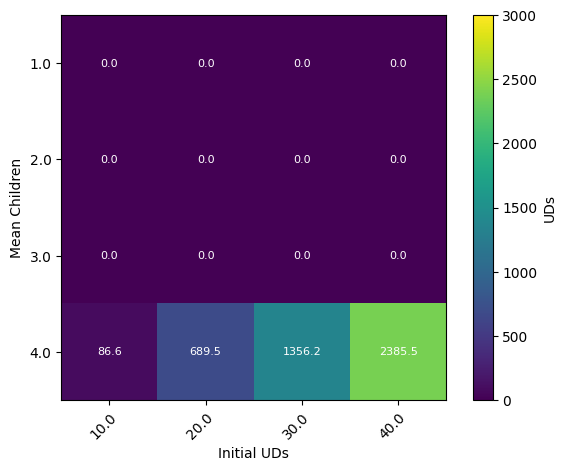

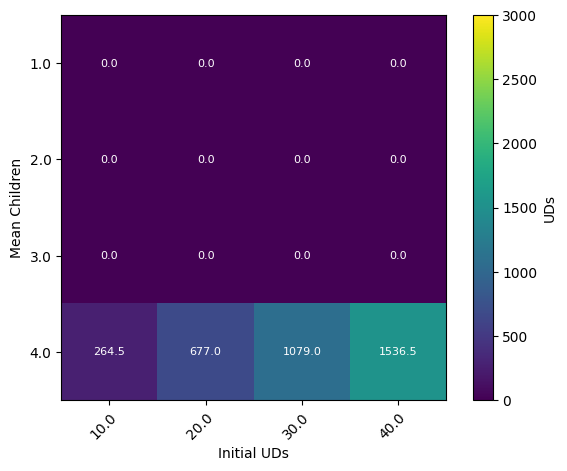

In [9]:
plot_heatmap(mM_datos, malphas, mbetas, 'Mean Children', 'Initial UDs', 'alive', (0, 3000))
plot_heatmap(mM_datos, malphas, mbetas, 'Mean Children', 'Initial UDs', 'std', (0, 3000))

In [8]:
def plot_heatmap(data, alphas, betas, alpha, beta, variable, colorbar_range=(0, 3000), figsize=(7, 5)):
    """
    Plot a heatmap with specific configuration for colorbar and labels.

    Parameters:
        data (list of list of dict): Data containing 'alive' values.
        alphas (list): Labels for the y-axis.
        betas (list): Labels for the x-axis.
        colorbar_range (tuple): Min and max values for the colorbar.
        figsize (tuple): Figure size for the plot.
    """
    # Extract 'alive' values
    alive_values = np.array([[entry[variable] for entry in row] for row in data])
    
    # Set up plot
    fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor="white")
    im = ax.imshow(alive_values, vmin=colorbar_range[0], vmax=colorbar_range[1])
    
    # Colorbar
    cbar = fig.colorbar(im, ax=ax, label='UDs')
    #cbar.set_clim(*colorbar_range)
    
    # Set ticks and labels
    ax.set_xticks(np.arange(len(betas)))
    ax.set_yticks(np.arange(len(alphas)))
    ax.set_xticklabels([f'{round(beta, 3)}' for beta in betas])
    ax.set_yticklabels([f'{alpha:.1f}' for alpha in alphas])
    
    # Display values in the heatmap cells
    for i in range(len(alphas)):
        for j in range(len(betas)):
            ax.text(j, i, f'{alive_values[i, j]:.1f}', ha="center", va="center", color="w", fontsize=8)
    
    # Label axes
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    ax.set_ylabel(alpha)
    ax.set_xlabel(beta)
    
    plt.show()

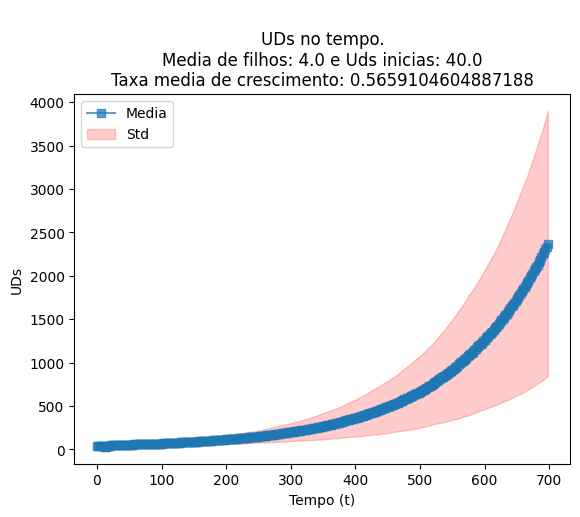

In [5]:
#Graph of experiment with mean and std
x = 3
y = 3

# Main line
plt.plot(mM_behavior[y][x]['tempo'], mM_behavior[y][x]['mean'], 's-', label='Media', alpha=0.7)

# Std
plt.fill_between(mM_behavior[y][x]['tempo'], mM_behavior[y][x]['mean'] - mM_behavior[y][x]['std'],
                 mM_behavior[y][x]['mean'] + mM_behavior[y][x]['std'], color='red', alpha=0.2, label='Std')

plt.xlabel('Tempo (t)')
plt.ylabel('UDs')
plt.title(f'''
UDs no tempo.
Media de filhos: {malphas[y]} e Uds inicias: {mbetas[x]}
Taxa media de crescimento: {mM_behavior[y][x]['growth rate']}''')
plt.legend()
plt.show()

## 2. UDs fixed

In [ ]:
#This experiment has Uds inicias in 40
iniciais = 40
n = 4
ualphas = np.linspace(1,n,n) # Average number of children: from 1 to n
ubetas = np.linspace(0.055, 0.075, 5) # Beta from 0.055 to 0.075
uM = np.empty((len(ualphas), len(ubetas)), dtype=object)
punto_vista = 2
tiempo = 700
tempo = list(range(0,tiempo,punto_vista))
experiments = 100

start = time.time()
# For data of behaviour
datos_2 = np.empty((len(ualphas), len(ubetas)), dtype=object)
print(uM.shape)

for i, media in enumerate(ualphas):
    for j, prob_morte  in enumerate(ubetas):
        list_alive_UDs = []
        list_vivas_puntos_vista = []
        tasas_crecimiento = []
        star_configuration = time.time()
        #original_media = media
        for experiment in range(1, experiments+1):
            #### Initialization
            ## Comunidades
            UD_endogamy.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                instancias_ud.append(UD_endogamy(id_ud, media))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_endogamy.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_endogamy.uds.values():
                    for _ in range(3):
                        ud.varieties.append(random.choice(initial_varieties))   
            # Lists for graphs
            vivas_puntos_vista = [int(iniciais)]
            vivas_tasa_crecimiento = [int(iniciais)]
            mortas_puntos_vista = [0]
            # Simulation
            for t in range(1, tiempo):
                uds_copy = {id_ud: ud for id_ud, ud in UD_endogamy.uds.items() if ud.activa}
                items = list(uds_copy.items())
                random.shuffle(items)
                uds_copy = dict(items)
                if not uds_copy:
                    # Only 0
                    print(f"acabó en el experimento {experiment} de la media {ualphas[i]} con prob de morte {ubetas[j]}")
                    vivas_puntos_vista.extend([0] * (int((tiempo/punto_vista)-(len(vivas_puntos_vista)))))
                    vivas_tasa_crecimiento.extend([0] * (int((tiempo)-(len(vivas_tasa_crecimiento)))))
                    #mortas_puntos_vista.extend([unidades_iniciais] * (tiempo - t))
                    break            
                for id_ud, ud in uds_copy.items():
                    if ud.activa == True:
                        any_ud_active = True
                        ud.ter_filho()
                        ud.buscar_ud(uds_copy, int(media),0)
                        ud.incrementar_idade()
                        ud.death_probability(prob_morte)
                # Collecting data
                vivas_tasa_crecimiento.append(len([ud for id, ud in uds_copy.items() if ud.activa]))
                if t % punto_vista == 0:
                    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
                    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
                    vivas_puntos_vista.append(viv)
#                     mortas_puntos_vista.append(mort)
#                 if t%100 == 0:
#                     print(f"tamos en tiempo {t} con vivas {viv}")
            # Average Annual Population Growth
            # First 0 avoid errors 
            indice_primer_cero = np.where(np.array(vivas_tasa_crecimiento) == 0)[0]
            if len(indice_primer_cero) > 0:
                # Get growth rate before the 0
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento[:indice_primer_cero[0] - 1]) / vivas_tasa_crecimiento[:-1][:indice_primer_cero[0] - 2] * 100)
            else:
                # Growth rate
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento) / vivas_tasa_crecimiento[:-1] * 100)
            print(f"acabó en el experimento {experiment} de la media {ualphas[i]} con prob de morte {ubetas[j]}")
            # Collect the data
            list_alive_UDs.append(len([ud for id, ud in uds_copy.items() if ud.activa == True])) #For heatmap
            list_vivas_puntos_vista.append(vivas_puntos_vista)
            #print(f"""
            #    Acabó la simulacion con media de {int(media)} y {int(iniciais)} unidades iniciales. Prob de morte: {prob_morte}
            #    poblacion total al final de la simulación: {len([ud for id, ud in uds_copy.items() if ud.activa == True])}""")
        #media = original_media
        end_config = time.time()
        uM[i][j] = {'alive': np.mean(list_alive_UDs),
                    'std': np.std(list_alive_UDs),
                    'time used': end_config - star_configuration}
        datos_2[i][j] = {'tempo': tempo, 
                         'mean': np.mean(list_vivas_puntos_vista, axis=0), 
                         'std':  np.std(list_vivas_puntos_vista, axis=0),
                         'growth rate': np.mean([np.mean(lista) for lista in tasas_crecimiento])}
        print(f"""
The total time of the configuration of mean {original_media} and beta {prob_morte:.3f} is  {end_config - star_configuration}
        """)
# Folders and save
folder_name = 'Kinship_no_control_pop'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Heatmap and std
heat_std = os.path.join(folder_name, 'Endo_UDin_fixed.npy')
np.save(heat_std, uM)
# Behavior of experiments
behavior = os.path.join(folder_name, 'Endo_Udin_fixed_data.npy')
np.save(behavior, datos_2)
now = datetime.now()
finish = time.time()
print(f"""
It finished at: {now}
It lasted {finish-start}
""")
print("done")

In [12]:
# Dowload the documents
#As reference
n = 4
ualphas = np.linspace(1,n,n) # Average number of children: from 1 to n
ubetas = np.arange(0.055, 0.07 + 0.005, 0.005) # Beta from 0.05 to 0.075
#Folders
folder_name = 'Kinship_no_control_pop'
heat_std = os.path.join(folder_name, 'Endo_UDin_fixed.npy')
behavior = os.path.join(folder_name, 'Endo_Udin_fixed_data.npy')
## heatmap and mean
uM_datos = np.load(heat_std, allow_pickle=True)
## behavior for experiments
uM_behavior = np.load(behavior, allow_pickle=True)

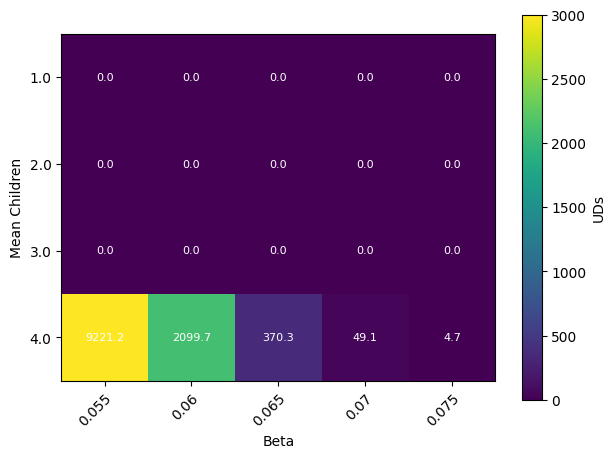

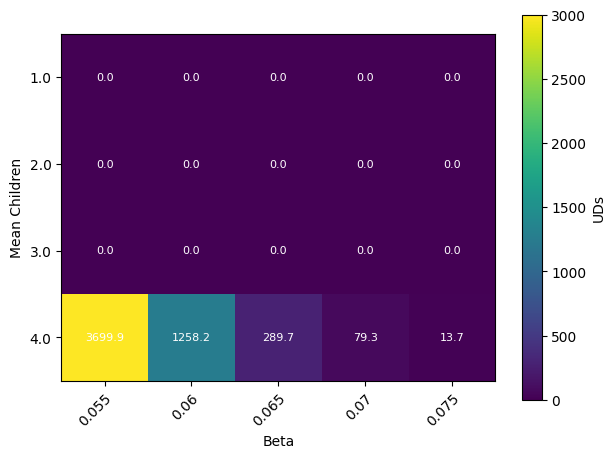

In [13]:
plot_heatmap(uM_datos, ualphas, ubetas, 'Mean Children', 'Beta', 'alive', (0, 3000))
plot_heatmap(uM_datos, ualphas, ubetas, 'Mean Children', 'Beta', 'std', (0, 3000))

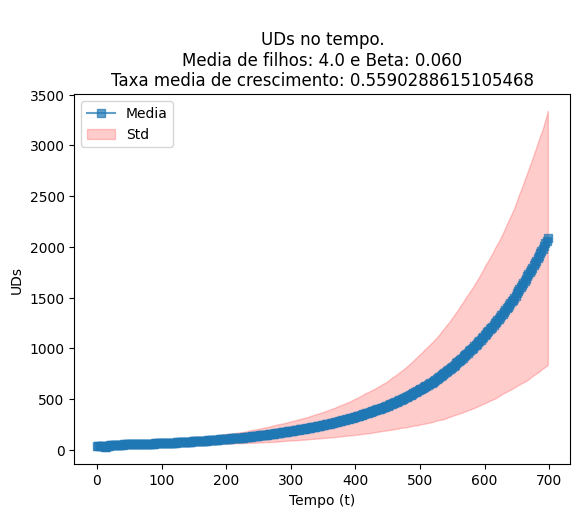

In [17]:
#Graph for each experiment
x = 1
y = 3

# Mean line
plt.plot(uM_behavior[y][x]['tempo'], uM_behavior[y][x]['mean'], 's-', label='Media', alpha=0.7)

# Std
plt.fill_between(uM_behavior[y][x]['tempo'], uM_behavior[y][x]['mean'] - uM_behavior[y][x]['std'],
                 uM_behavior[y][x]['mean'] + uM_behavior[y][x]['std'], color='red', alpha=0.2, label='Std')

plt.xlabel('Tempo (t)')
plt.ylabel('UDs')
plt.title(f'''
UDs no tempo.
Media de filhos: {ualphas[y]} e Beta: {ubetas[x]:.3f}
Taxa media de crescimento: {uM_behavior[y][x]['growth rate']}''')
plt.legend()
plt.show()

In [44]:
    uM_behavior[1][0]

{'tempo': [0,
  2,
  4,
  6,
  8,
  10,
  12,
  14,
  16,
  18,
  20,
  22,
  24,
  26,
  28,
  30,
  32,
  34,
  36,
  38,
  40,
  42,
  44,
  46,
  48,
  50,
  52,
  54,
  56,
  58,
  60,
  62,
  64,
  66,
  68,
  70,
  72,
  74,
  76,
  78,
  80,
  82,
  84,
  86,
  88,
  90,
  92,
  94,
  96,
  98,
  100,
  102,
  104,
  106,
  108,
  110,
  112,
  114,
  116,
  118,
  120,
  122,
  124,
  126,
  128,
  130,
  132,
  134,
  136,
  138,
  140,
  142,
  144,
  146,
  148,
  150,
  152,
  154,
  156,
  158,
  160,
  162,
  164,
  166,
  168,
  170,
  172,
  174,
  176,
  178,
  180,
  182,
  184,
  186,
  188,
  190,
  192,
  194,
  196,
  198,
  200,
  202,
  204,
  206,
  208,
  210,
  212,
  214,
  216,
  218,
  220,
  222,
  224,
  226,
  228,
  230,
  232,
  234,
  236,
  238,
  240,
  242,
  244,
  246,
  248,
  250,
  252,
  254,
  256,
  258,
  260,
  262,
  264,
  266,
  268,
  270,
  272,
  274,
  276,
  278,
  280,
  282,
  284,
  286,
  288,
  290,
  292,
  294,
  296,
  2

## 3. Mean fixed

In [30]:
#This experiment has mean of children: 4
media = 4
n = 40
halphas = np.linspace(10,n,int(n/10)) # Unidades inicias from 10 to 50
hbetas = np.linspace(0.055, 0.075, 5) # Beta from 0.055 to 0.075
hM = np.empty((len(halphas), len(hbetas)), dtype=object)
punto_vista = 2
tiempo = 700
tempo = list(range(0,tiempo,punto_vista))
experiments = 100

start = time.time()
# For data of behaviour
datos_3 = np.empty((len(halphas), len(hbetas)), dtype=object)
# print(uM.shape)

for i, iniciais in enumerate(halphas):
    for j, prob_morte  in enumerate(hbetas):
        list_alive_UDs = []
        list_vivas_puntos_vista = []
        tasas_crecimiento = []
        star_configuration = time.time()
        for experiment in range(1, experiments+1):
            #### Initialization
            UD_endogamy.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                instancias_ud.append(UD_endogamy(id_ud, media))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_endogamy.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_endogamy.uds.values():
                    for _ in range(3):
                        ud.varieties.append(random.choice(initial_varieties))   
            # Lists for graphs
            vivas_puntos_vista = [int(iniciais)]
            vivas_tasa_crecimiento = [int(iniciais)]
            mortas_puntos_vista = [0]
            # Simulation
            for t in range(1, tiempo):
                uds_copy = {id_ud: ud for id_ud, ud in UD_endogamy.uds.items() if ud.activa}
                items = list(uds_copy.items())
                random.shuffle(items)
                uds_copy = dict(items)
                if not uds_copy:
                    # Only 0
                    print(f"acabó en el experimento {experiment} de iniciales {halphas[i]} con beta {hbetas[j]}")
                    vivas_puntos_vista.extend([0] * (int((tiempo/punto_vista)-(len(vivas_puntos_vista)))))
                    vivas_tasa_crecimiento.extend([0] * (int((tiempo)-(len(vivas_tasa_crecimiento)))))
                    #mortas_puntos_vista.extend([unidades_iniciais] * (tiempo - t))
                    break               
                for id_ud, ud in uds_copy.items():
                    if ud.activa == True:
                        any_ud_active = True
                        ud.ter_filho()
                        ud.buscar_ud(uds_copy, int(media),0)
                        ud.incrementar_idade()
                        ud.death_probability(prob_morte)
                # Collecting data
                vivas_tasa_crecimiento.append(len([ud for id, ud in uds_copy.items() if ud.activa]))
                if t % punto_vista == 0:
                    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
                    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
                    vivas_puntos_vista.append(viv)
#                     mortas_puntos_vista.append(mort)
#                 if t%100 == 0:
#                     print(f"tamos en tiempo {t} con vivas {viv}")
            # Average Annual Population Growth
            # First 0 avoid errors 
            indice_primer_cero = np.where(np.array(vivas_tasa_crecimiento) == 0)[0]
            if len(indice_primer_cero) > 0:
                # Get growth rate before the 0
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento[:indice_primer_cero[0] - 1]) / vivas_tasa_crecimiento[:-1][:indice_primer_cero[0] - 2] * 100)
            else:
                # Growth rate
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento) / vivas_tasa_crecimiento[:-1] * 100)
            print(f"acabó en el experimento {experiment} de iniciales {halphas[i]} con prob de morte {hbetas[j]}")
            # Collect the data
            list_alive_UDs.append(len([ud for id, ud in uds_copy.items() if ud.activa == True])) #For heatmap
            list_vivas_puntos_vista.append(vivas_puntos_vista)
            #print(f"""
            #    Acabó la simulacion con media de {int(media)} y {int(iniciais)} unidades iniciales. Prob de morte: {prob_morte}
            #    poblacion total al final de la simulación: {len([ud for id, ud in uds_copy.items() if ud.activa == True])}""")
        end_config = time.time()
        hM[i][j] = {'alive': np.mean(list_alive_UDs),
                    'std': np.std(list_alive_UDs),
                    'time used': end_config - star_configuration}
        datos_3[i][j] = {'tempo': tempo, 
                         'mean': np.mean(list_vivas_puntos_vista, axis=0), 
                         'std':  np.std(list_vivas_puntos_vista, axis=0),
                         'growth rate': np.mean([np.mean(lista) for lista in tasas_crecimiento])}
        print(f"""
The total time of the configuration of Initial UDs {iniciais} and beta {prob_morte:.3f} is: {end_config - star_configuration}
        """)
# Folders and save
folder_name = 'Kinship_no_control_pop'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Heatmap and std
heat_std = os.path.join(folder_name, 'Endo_Mean_fixed.npy')
np.save(heat_std, hM)
# Behavior of experiments
behavior = os.path.join(folder_name, 'Endo_Mean_fixed_data.npy')
np.save(behavior, datos_3)
now = datetime.now()
finish = time.time()
print(f"""
It finished at: {now}
It lasted {finish-start}
""")
print("done")

KeyboardInterrupt: 

In [14]:
# Dowload the documents
#As reference
n = 40
halphas = np.linspace(10,n,int(n/10)) # Unidades inicias from 10 to 50
hbetas = np.arange(0.055, 0.07 + 0.005, 0.005) # Beta from 0.055 to 0.075
#Folders
folder_name = 'Kinship_no_control_pop'
heat_std = os.path.join(folder_name, 'Endo_Mean_fixed.npy')
behavior = os.path.join(folder_name, 'Endo_Mean_fixed_data.npy')
## heatmap and mean
hM_datos = np.load(heat_std, allow_pickle=True)
## behavior for experiments
hM_behavior = np.load(behavior, allow_pickle=True)

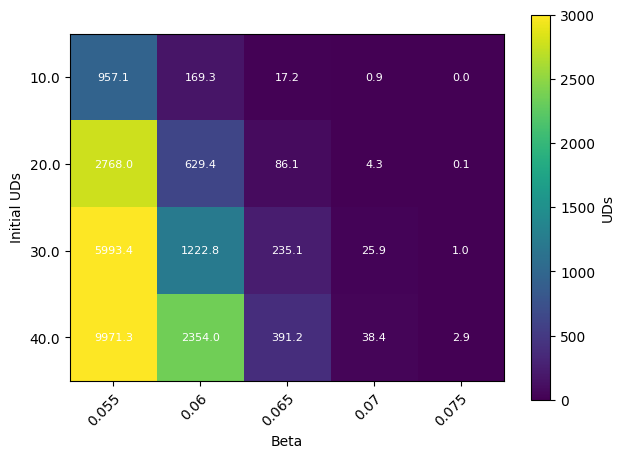

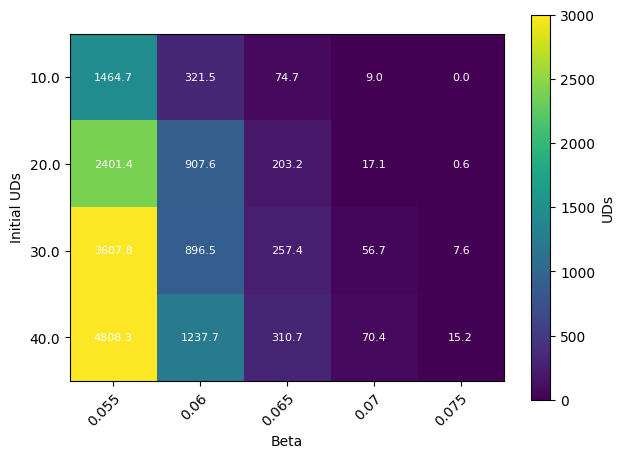

In [15]:
plot_heatmap(hM_datos, halphas, hbetas, 'Initial UDs', 'Beta', 'alive')
plot_heatmap(hM_datos, halphas, hbetas, 'Initial UDs', 'Beta', 'std')

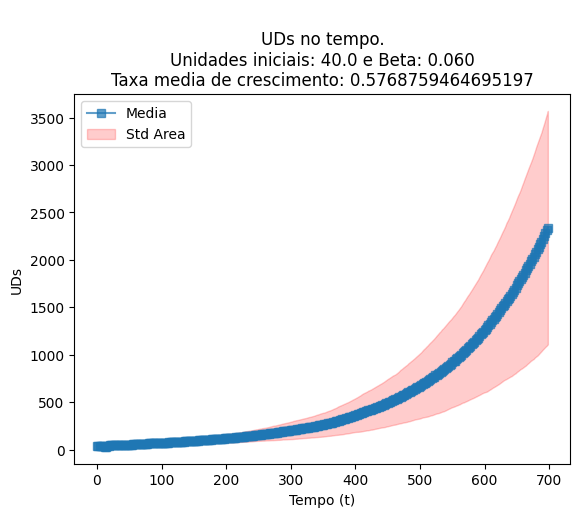

In [22]:
x = 1
y = 3

# MEan line
plt.plot(hM_behavior[y][x]['tempo'], hM_behavior[y][x]['mean'], 's-', label='Media', alpha=0.7)

# Std
plt.fill_between(hM_behavior[y][x]['tempo'], hM_behavior[y][x]['mean'] - hM_behavior[y][x]['std'],
                 hM_behavior[y][x]['mean'] + hM_behavior[y][x]['std'], color='red', alpha=0.2, label='Std Area')

plt.xlabel('Tempo (t)')
plt.ylabel('UDs')
plt.title(f'''
UDs no tempo.
Unidades iniciais: {halphas[y]} e Beta: {hbetas[x]:.3f}
Taxa media de crescimento: {hM_behavior[y][x]['growth rate']}''')
plt.legend()
plt.show()

# Dual organization

## 1. Beta fixed

In [2]:
#This experiment has the beta fixed in 0.06
prob_morte = 0.06
n = 4
m = 40
malphas = np.linspace(1,n,n) # Average number of children: from 1 to n
mbetas = np.linspace(10,m,int(m/10)) # Initial UDs: from 10 to m
mM = np.empty((len(malphas), len(mbetas)), dtype=object)
punto_vista = 2
tiempo = 700
tempo = list(range(0,tiempo,punto_vista))
experiments = 100

# For data of behaviour
datos_1 = np.empty((len(malphas), len(mbetas)), dtype=object)
print(mM.shape)
start = time.time()

for i, media in enumerate(malphas):
    for j, iniciais  in enumerate(mbetas):
        list_alive_UDs = []
        list_vivas_puntos_vista = []
        tasas_crecimiento = []
        star_configuration = time.time()
        original_media = media
        for experiment in range(1, experiments+1):
            #### Initialization
            clanes = [1,2]
            clans = (clanes * (int(iniciais) // 2)) + clanes[:(int(iniciais) % 2)]
            random.shuffle(clans)
            UD_dual_organization.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                instancias_ud.append(UD_dual_organization(id_ud, media, clans.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_dual_organization.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_dual_organization.uds.values():
                    for _ in range(3):
                        ud.varieties.append(random.choice(initial_varieties))
            # Lists for graphs
            vivas_puntos_vista = [int(iniciais)]
            vivas_tasa_crecimiento = [int(iniciais)]
            mortas_puntos_vista = [0]
            # Simulation
            for t in range(1, tiempo):
                uds_copy = {id_ud: ud for id_ud, ud in UD_dual_organization.uds.items() if ud.activa}
                items = list(uds_copy.items())
                random.shuffle(items)
                uds_copy = dict(items)   
                if not uds_copy:
                    # Only 0
                    print(f"acabó en el experimento {experiment} de la media {malphas[i]} con unidades {mbetas[j]}")
                    vivas_puntos_vista.extend([0] * (int((tiempo/punto_vista)-(len(vivas_puntos_vista)))))
                    vivas_tasa_crecimiento.extend([0] * (int((tiempo)-(len(vivas_tasa_crecimiento)))))
                    #mortas_puntos_vista.extend([unidades_iniciais] * (tiempo - t))
                    break
                for id_ud, ud in uds_copy.items():
                    any_ud_active = True
                    ud.ter_filho()
                    ud.buscar_ud(uds_copy, int(media),0 , True, 0.2)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
                # Collecting data
                vivas_tasa_crecimiento.append(len([ud for id, ud in uds_copy.items() if ud.activa]))
                if t % punto_vista == 0:
                    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
                    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
                    vivas_puntos_vista.append(viv)
#                     mortas_puntos_vista.append(mort)
#                 if t%100 == 0:
#                     print(f"tamos en tiempo {t} con vivas {viv}")
            # Average Annual Population Growth
            # First 0 avoid errors 
            indice_primer_cero = np.where(np.array(vivas_tasa_crecimiento) == 0)[0]
            if len(indice_primer_cero) > 0:
                # Get growth rate before the 0
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento[:indice_primer_cero[0] - 1]) / vivas_tasa_crecimiento[:-1][:indice_primer_cero[0] - 2] * 100)
            else:
                # Growth rate
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento) / vivas_tasa_crecimiento[:-1] * 100)
            # Collect the data
            list_alive_UDs.append(len([ud for id, ud in uds_copy.items() if ud.activa == True])) #For heatmap
            list_vivas_puntos_vista.append(vivas_puntos_vista)
            #print(f"""
            #    Acabó la simulacion con media de {int(media)} y {int(iniciais)} unidades iniciales. Prob de morte: {prob_morte}
            #    poblacion total al final de la simulación: {len([ud for id, ud in uds_copy.items() if ud.activa == True])}""")
        media = original_media
        end_config = time.time()
        mM[i][j] = {'alive': np.mean(list_alive_UDs),
                    'std': np.std(list_alive_UDs),
                    'time used': end_config - star_configuration}
        datos_1[i][j] = {'tempo': tempo, 
                         'mean': np.mean(list_vivas_puntos_vista, axis=0), 
                         'std':  np.std(list_vivas_puntos_vista, axis=0),
                         'growth rate': np.mean([np.mean(lista) for lista in tasas_crecimiento])}
        print(f"""
The total time of the configuration of mean {media} and initial UDs {iniciais} is  {end_config - star_configuration}
        """)
# Folder
folder_name = 'Kinship_no_control_pop'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Heatmap and std
heat_std = os.path.join(folder_name, 'Dual_beta_fixed.npy')
np.save(heat_std, mM)
# Behavior of experiments
behavior = os.path.join(folder_name, 'Dual_beta_fixed_data.npy')
np.save(behavior, datos_1)
now = datetime.now()
finish = time.time()
print(f"""
It finished at: {now}
It lasted {finish-start}
""")
print("done")

(4, 4)
acabó en el experimento 1 de la media 1.0 con unidades 10.0
acabó en el experimento 2 de la media 1.0 con unidades 10.0
acabó en el experimento 3 de la media 1.0 con unidades 10.0
acabó en el experimento 4 de la media 1.0 con unidades 10.0
acabó en el experimento 5 de la media 1.0 con unidades 10.0
acabó en el experimento 6 de la media 1.0 con unidades 10.0
acabó en el experimento 7 de la media 1.0 con unidades 10.0
acabó en el experimento 8 de la media 1.0 con unidades 10.0
acabó en el experimento 9 de la media 1.0 con unidades 10.0
acabó en el experimento 10 de la media 1.0 con unidades 10.0
acabó en el experimento 11 de la media 1.0 con unidades 10.0
acabó en el experimento 12 de la media 1.0 con unidades 10.0
acabó en el experimento 13 de la media 1.0 con unidades 10.0
acabó en el experimento 14 de la media 1.0 con unidades 10.0
acabó en el experimento 15 de la media 1.0 con unidades 10.0
acabó en el experimento 16 de la media 1.0 con unidades 10.0
acabó en el experimento 17

acabó en el experimento 55 de la media 1.0 con unidades 20.0
acabó en el experimento 56 de la media 1.0 con unidades 20.0
acabó en el experimento 57 de la media 1.0 con unidades 20.0
acabó en el experimento 58 de la media 1.0 con unidades 20.0
acabó en el experimento 59 de la media 1.0 con unidades 20.0
acabó en el experimento 60 de la media 1.0 con unidades 20.0
acabó en el experimento 61 de la media 1.0 con unidades 20.0
acabó en el experimento 62 de la media 1.0 con unidades 20.0
acabó en el experimento 63 de la media 1.0 con unidades 20.0
acabó en el experimento 64 de la media 1.0 con unidades 20.0
acabó en el experimento 65 de la media 1.0 con unidades 20.0
acabó en el experimento 66 de la media 1.0 con unidades 20.0
acabó en el experimento 67 de la media 1.0 con unidades 20.0
acabó en el experimento 68 de la media 1.0 con unidades 20.0
acabó en el experimento 69 de la media 1.0 con unidades 20.0
acabó en el experimento 70 de la media 1.0 con unidades 20.0
acabó en el experimento 

acabó en el experimento 92 de la media 1.0 con unidades 30.0
acabó en el experimento 93 de la media 1.0 con unidades 30.0
acabó en el experimento 94 de la media 1.0 con unidades 30.0
acabó en el experimento 95 de la media 1.0 con unidades 30.0
acabó en el experimento 96 de la media 1.0 con unidades 30.0
acabó en el experimento 97 de la media 1.0 con unidades 30.0
acabó en el experimento 98 de la media 1.0 con unidades 30.0
acabó en el experimento 99 de la media 1.0 con unidades 30.0
acabó en el experimento 100 de la media 1.0 con unidades 30.0

The total time of the configuration of mean 1.0 and initial UDs 30.0 is  1.299377679824829
        
acabó en el experimento 1 de la media 1.0 con unidades 40.0
acabó en el experimento 2 de la media 1.0 con unidades 40.0
acabó en el experimento 3 de la media 1.0 con unidades 40.0
acabó en el experimento 4 de la media 1.0 con unidades 40.0
acabó en el experimento 5 de la media 1.0 con unidades 40.0
acabó en el experimento 6 de la media 1.0 con uni

acabó en el experimento 36 de la media 2.0 con unidades 10.0
acabó en el experimento 37 de la media 2.0 con unidades 10.0
acabó en el experimento 38 de la media 2.0 con unidades 10.0
acabó en el experimento 39 de la media 2.0 con unidades 10.0
acabó en el experimento 40 de la media 2.0 con unidades 10.0
acabó en el experimento 41 de la media 2.0 con unidades 10.0
acabó en el experimento 42 de la media 2.0 con unidades 10.0
acabó en el experimento 43 de la media 2.0 con unidades 10.0
acabó en el experimento 44 de la media 2.0 con unidades 10.0
acabó en el experimento 45 de la media 2.0 con unidades 10.0
acabó en el experimento 46 de la media 2.0 con unidades 10.0
acabó en el experimento 47 de la media 2.0 con unidades 10.0
acabó en el experimento 48 de la media 2.0 con unidades 10.0
acabó en el experimento 49 de la media 2.0 con unidades 10.0
acabó en el experimento 50 de la media 2.0 con unidades 10.0
acabó en el experimento 51 de la media 2.0 con unidades 10.0
acabó en el experimento 

acabó en el experimento 72 de la media 2.0 con unidades 20.0
acabó en el experimento 73 de la media 2.0 con unidades 20.0
acabó en el experimento 74 de la media 2.0 con unidades 20.0
acabó en el experimento 75 de la media 2.0 con unidades 20.0
acabó en el experimento 76 de la media 2.0 con unidades 20.0
acabó en el experimento 77 de la media 2.0 con unidades 20.0
acabó en el experimento 78 de la media 2.0 con unidades 20.0
acabó en el experimento 79 de la media 2.0 con unidades 20.0
acabó en el experimento 80 de la media 2.0 con unidades 20.0
acabó en el experimento 81 de la media 2.0 con unidades 20.0
acabó en el experimento 82 de la media 2.0 con unidades 20.0
acabó en el experimento 83 de la media 2.0 con unidades 20.0
acabó en el experimento 84 de la media 2.0 con unidades 20.0
acabó en el experimento 85 de la media 2.0 con unidades 20.0
acabó en el experimento 86 de la media 2.0 con unidades 20.0
acabó en el experimento 87 de la media 2.0 con unidades 20.0
acabó en el experimento 

acabó en el experimento 8 de la media 2.0 con unidades 40.0
acabó en el experimento 9 de la media 2.0 con unidades 40.0
acabó en el experimento 10 de la media 2.0 con unidades 40.0
acabó en el experimento 11 de la media 2.0 con unidades 40.0
acabó en el experimento 12 de la media 2.0 con unidades 40.0
acabó en el experimento 13 de la media 2.0 con unidades 40.0
acabó en el experimento 14 de la media 2.0 con unidades 40.0
acabó en el experimento 15 de la media 2.0 con unidades 40.0
acabó en el experimento 16 de la media 2.0 con unidades 40.0
acabó en el experimento 17 de la media 2.0 con unidades 40.0
acabó en el experimento 18 de la media 2.0 con unidades 40.0
acabó en el experimento 19 de la media 2.0 con unidades 40.0
acabó en el experimento 20 de la media 2.0 con unidades 40.0
acabó en el experimento 21 de la media 2.0 con unidades 40.0
acabó en el experimento 22 de la media 2.0 con unidades 40.0
acabó en el experimento 23 de la media 2.0 con unidades 40.0
acabó en el experimento 24

acabó en el experimento 45 de la media 3.0 con unidades 10.0
acabó en el experimento 46 de la media 3.0 con unidades 10.0
acabó en el experimento 47 de la media 3.0 con unidades 10.0
acabó en el experimento 48 de la media 3.0 con unidades 10.0
acabó en el experimento 49 de la media 3.0 con unidades 10.0
acabó en el experimento 50 de la media 3.0 con unidades 10.0
acabó en el experimento 51 de la media 3.0 con unidades 10.0
acabó en el experimento 52 de la media 3.0 con unidades 10.0
acabó en el experimento 53 de la media 3.0 con unidades 10.0
acabó en el experimento 54 de la media 3.0 con unidades 10.0
acabó en el experimento 55 de la media 3.0 con unidades 10.0
acabó en el experimento 56 de la media 3.0 con unidades 10.0
acabó en el experimento 57 de la media 3.0 con unidades 10.0
acabó en el experimento 58 de la media 3.0 con unidades 10.0
acabó en el experimento 59 de la media 3.0 con unidades 10.0
acabó en el experimento 60 de la media 3.0 con unidades 10.0
acabó en el experimento 

acabó en el experimento 79 de la media 3.0 con unidades 20.0
acabó en el experimento 80 de la media 3.0 con unidades 20.0
acabó en el experimento 81 de la media 3.0 con unidades 20.0
acabó en el experimento 82 de la media 3.0 con unidades 20.0
acabó en el experimento 83 de la media 3.0 con unidades 20.0
acabó en el experimento 84 de la media 3.0 con unidades 20.0
acabó en el experimento 85 de la media 3.0 con unidades 20.0
acabó en el experimento 86 de la media 3.0 con unidades 20.0
acabó en el experimento 87 de la media 3.0 con unidades 20.0
acabó en el experimento 88 de la media 3.0 con unidades 20.0
acabó en el experimento 89 de la media 3.0 con unidades 20.0
acabó en el experimento 90 de la media 3.0 con unidades 20.0
acabó en el experimento 91 de la media 3.0 con unidades 20.0
acabó en el experimento 92 de la media 3.0 con unidades 20.0
acabó en el experimento 93 de la media 3.0 con unidades 20.0
acabó en el experimento 94 de la media 3.0 con unidades 20.0
acabó en el experimento 

acabó en el experimento 54 de la media 4.0 con unidades 10.0
acabó en el experimento 56 de la media 4.0 con unidades 10.0
acabó en el experimento 57 de la media 4.0 con unidades 10.0
acabó en el experimento 58 de la media 4.0 con unidades 10.0
acabó en el experimento 59 de la media 4.0 con unidades 10.0
acabó en el experimento 60 de la media 4.0 con unidades 10.0
acabó en el experimento 61 de la media 4.0 con unidades 10.0
acabó en el experimento 62 de la media 4.0 con unidades 10.0
acabó en el experimento 63 de la media 4.0 con unidades 10.0
acabó en el experimento 64 de la media 4.0 con unidades 10.0
acabó en el experimento 65 de la media 4.0 con unidades 10.0
acabó en el experimento 66 de la media 4.0 con unidades 10.0
acabó en el experimento 67 de la media 4.0 con unidades 10.0
acabó en el experimento 68 de la media 4.0 con unidades 10.0
acabó en el experimento 69 de la media 4.0 con unidades 10.0
acabó en el experimento 70 de la media 4.0 con unidades 10.0
acabó en el experimento 

In [16]:
# Dowload the documents
#As a reference
n = 4
m = 40
malphas = np.linspace(1,n,n) # Average number of children: from 1 to n
mbetas = np.linspace(10,m,int(m/10)) # Initial UDs: from 10 to m
#Folders
folder_name = 'Kinship_no_control_pop'
heat_std = os.path.join(folder_name, 'Dual_beta_fixed.npy')
behavior = os.path.join(folder_name, 'Dual_beta_fixed_data.npy')
## heatmap and mean
mM_datos = np.load(heat_std, allow_pickle=True)
## behavior for experiments
mM_behavior = np.load(behavior, allow_pickle=True)

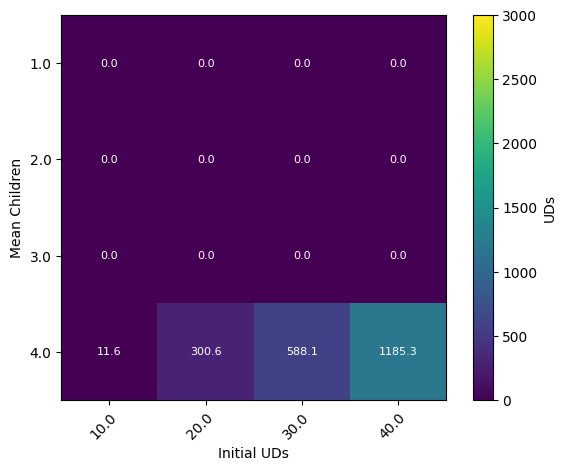

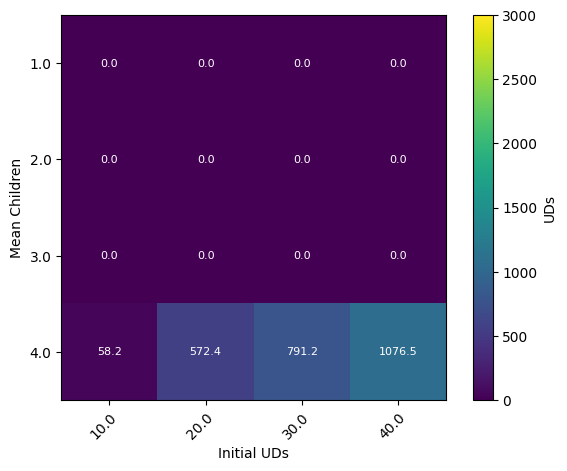

In [17]:
plot_heatmap(mM_datos, malphas, mbetas, 'Mean Children', 'Initial UDs', 'alive', (0, 3000))
plot_heatmap(mM_datos, malphas, mbetas, 'Mean Children', 'Initial UDs', 'std', (0, 3000))

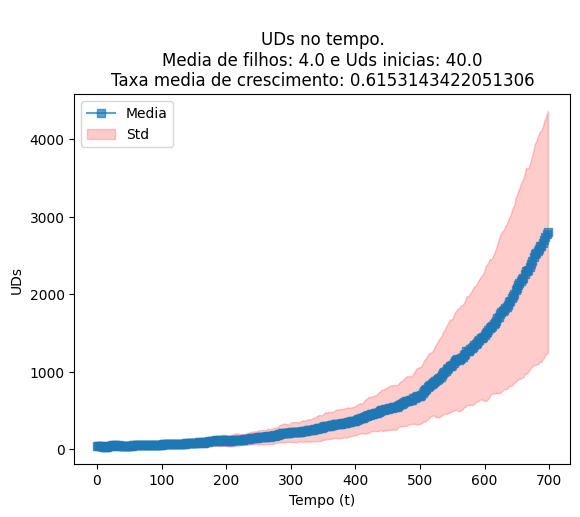

In [63]:
#Graph of experiment with mean and std
x = 3
y = 3

# Main line
plt.plot(mM_behavior[y][x]['tempo'], mM_behavior[y][x]['mean'], 's-', label='Media', alpha=0.7)

# Std
plt.fill_between(mM_behavior[y][x]['tempo'], mM_behavior[y][x]['mean'] - mM_behavior[y][x]['std'],
                 mM_behavior[y][x]['mean'] + mM_behavior[y][x]['std'], color='red', alpha=0.2, label='Std')

plt.xlabel('Tempo (t)')
plt.ylabel('UDs')
plt.title(f'''
UDs no tempo.
Media de filhos: {malphas[y]} e Uds inicias: {mbetas[x]}
Taxa media de crescimento: {mM_behavior[y][x]['growth rate']}''')
plt.legend()
plt.show()

## 2. UDs fixed

In [3]:
#This experiment has Uds inicias in 40
iniciais = 40
n = 4
ualphas = np.linspace(1,n,n) # Average number of children: from 1 to n
ubetas = np.linspace(0.055, 0.075, 5) # Beta from 0.045 to 0.075
uM = np.empty((len(ualphas), len(ubetas)), dtype=object)
punto_vista = 50
tiempo = 700
tempo = list(range(0,tiempo,punto_vista))
experiments = 100

start = time.time()
# For data of behaviour
datos_2 = np.empty((len(ualphas), len(ubetas)), dtype=object)
print(uM.shape)

for i, media in enumerate(ualphas):
    for j, prob_morte  in enumerate(ubetas):
        list_alive_UDs = []
        list_vivas_puntos_vista = []
        tasas_crecimiento = []
        star_configuration = time.time()
        for experiment in range(1, experiments+1):
            print(f'Go with experiment {experiment}')
            #### Initialization
            clanes = [1,2]
            clans = (clanes * (int(iniciais) // 2)) + clanes[:(int(iniciais) % 2)]
            random.shuffle(clans)
            UD_dual_organization.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                instancias_ud.append(UD_dual_organization(id_ud, media, clans.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_dual_organization.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_dual_organization.uds.values():
                    for _ in range(3):
                        ud.varieties.append(random.choice(initial_varieties))
            # Lists for graphs
            vivas_puntos_vista = [int(iniciais)]
            vivas_tasa_crecimiento = [int(iniciais)]
            mortas_puntos_vista = [0]
            # Simulation
            for t in range(1, tiempo):
                uds_copy = {id_ud: ud for id_ud, ud in UD_dual_organization.uds.items() if ud.activa}
                items = list(uds_copy.items())
                random.shuffle(items)
                uds_copy = dict(items)  
                if not uds_copy:
                    # Only 0
                    #print(f"acabó en el experimento {experiment} de la media {malphas[i]} con unidades {mbetas[j]}")
                    vivas_puntos_vista.extend([0] * (int((tiempo/punto_vista)-(len(vivas_puntos_vista)))))
                    vivas_tasa_crecimiento.extend([0] * (int((tiempo)-(len(vivas_tasa_crecimiento)))))
                    #mortas_puntos_vista.extend([unidades_iniciais] * (tiempo - t))
                    break
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(uds_copy, int(media),0 , True, 0.2)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
                # Collecting data
                vivas_tasa_crecimiento.append(len([ud for id, ud in uds_copy.items() if ud.activa]))
                if t % punto_vista == 0:
                    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
                    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
                    vivas_puntos_vista.append(viv)
#                     mortas_puntos_vista.append(mort)
            # Average Annual Population Growth
            indice_primer_cero = np.where(np.array(vivas_tasa_crecimiento) == 0)[0]
            if len(indice_primer_cero) > 0:
                # Only before 0
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento[:indice_primer_cero[0] - 1]) / vivas_tasa_crecimiento[:-1][:indice_primer_cero[0] - 2] * 100)
            else:
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento) / vivas_tasa_crecimiento[:-1] * 100)
            # Collect the data
            print(f"acabó en el experimento {experiment}")
            list_alive_UDs.append(len([ud for id, ud in uds_copy.items() if ud.activa == True])) #For heatmap
            list_vivas_puntos_vista.append(vivas_puntos_vista)
            #print(f"""
            #    Acabó la simulacion con media de {int(media)} y {int(iniciais)} unidades iniciales. Prob de morte: {prob_morte}
            #    poblacion total al final de la simulación: {len([ud for id, ud in uds_copy.items() if ud.activa == True])}""")
        end_config = time.time()
        uM[i][j] = {'alive': np.mean(list_alive_UDs),
                    'std': np.std(list_alive_UDs),
                    'time used': end_config - star_configuration}
        datos_2[i][j] = {'tempo': tempo, 
                         'mean': np.mean(list_vivas_puntos_vista, axis=0), 
                         'std':  np.std(list_vivas_puntos_vista, axis=0),
                         'growth rate': np.mean([np.mean(lista) for lista in tasas_crecimiento])}
        print(f"""
The total time of the configuration of mean {media} and beta {prob_morte:.3f} is  {end_config - star_configuration}
        """)
# Folders and save
folder_name = 'Kinship_no_control_pop'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Heatmap and std
heat_std = os.path.join(folder_name, 'Dual_UDin_fixed.npy')
np.save(heat_std, uM)
# Behavior of experiments
behavior = os.path.join(folder_name, 'Dual_Udin_fixed_data.npy')
np.save(behavior, datos_2)
now = datetime.now()
finish = time.time()
print(f"""
It finished at: {now}
It lasted {finish-start}
""")
print("done")

(4, 5)
Go with experiment 1
acabó en el experimento 1
Go with experiment 2
acabó en el experimento 2
Go with experiment 3
acabó en el experimento 3
Go with experiment 4
acabó en el experimento 4
Go with experiment 5
acabó en el experimento 5
Go with experiment 6
acabó en el experimento 6
Go with experiment 7
acabó en el experimento 7
Go with experiment 8
acabó en el experimento 8
Go with experiment 9
acabó en el experimento 9
Go with experiment 10
acabó en el experimento 10
Go with experiment 11
acabó en el experimento 11
Go with experiment 12
acabó en el experimento 12
Go with experiment 13
acabó en el experimento 13
Go with experiment 14
acabó en el experimento 14
Go with experiment 15
acabó en el experimento 15
Go with experiment 16
acabó en el experimento 16
Go with experiment 17
acabó en el experimento 17
Go with experiment 18
acabó en el experimento 18
Go with experiment 19
acabó en el experimento 19
Go with experiment 20
acabó en el experimento 20
Go with experiment 21
acabó en 

acabó en el experimento 74
Go with experiment 75
acabó en el experimento 75
Go with experiment 76
acabó en el experimento 76
Go with experiment 77
acabó en el experimento 77
Go with experiment 78
acabó en el experimento 78
Go with experiment 79
acabó en el experimento 79
Go with experiment 80
acabó en el experimento 80
Go with experiment 81
acabó en el experimento 81
Go with experiment 82
acabó en el experimento 82
Go with experiment 83
acabó en el experimento 83
Go with experiment 84
acabó en el experimento 84
Go with experiment 85
acabó en el experimento 85
Go with experiment 86
acabó en el experimento 86
Go with experiment 87
acabó en el experimento 87
Go with experiment 88
acabó en el experimento 88
Go with experiment 89
acabó en el experimento 89
Go with experiment 90
acabó en el experimento 90
Go with experiment 91
acabó en el experimento 91
Go with experiment 92
acabó en el experimento 92
Go with experiment 93
acabó en el experimento 93
Go with experiment 94
acabó en el experime

acabó en el experimento 58
Go with experiment 59
acabó en el experimento 59
Go with experiment 60
acabó en el experimento 60
Go with experiment 61
acabó en el experimento 61
Go with experiment 62
acabó en el experimento 62
Go with experiment 63
acabó en el experimento 63
Go with experiment 64
acabó en el experimento 64
Go with experiment 65
acabó en el experimento 65
Go with experiment 66
acabó en el experimento 66
Go with experiment 67
acabó en el experimento 67
Go with experiment 68
acabó en el experimento 68
Go with experiment 69
acabó en el experimento 69
Go with experiment 70
acabó en el experimento 70
Go with experiment 71
acabó en el experimento 71
Go with experiment 72
acabó en el experimento 72
Go with experiment 73
acabó en el experimento 73
Go with experiment 74
acabó en el experimento 74
Go with experiment 75
acabó en el experimento 75
Go with experiment 76
acabó en el experimento 76
Go with experiment 77
acabó en el experimento 77
Go with experiment 78
acabó en el experime

acabó en el experimento 24
Go with experiment 25
acabó en el experimento 25
Go with experiment 26
acabó en el experimento 26
Go with experiment 27
acabó en el experimento 27
Go with experiment 28
acabó en el experimento 28
Go with experiment 29
acabó en el experimento 29
Go with experiment 30
acabó en el experimento 30
Go with experiment 31
acabó en el experimento 31
Go with experiment 32
acabó en el experimento 32
Go with experiment 33
acabó en el experimento 33
Go with experiment 34
acabó en el experimento 34
Go with experiment 35
acabó en el experimento 35
Go with experiment 36
acabó en el experimento 36
Go with experiment 37
acabó en el experimento 37
Go with experiment 38
acabó en el experimento 38
Go with experiment 39
acabó en el experimento 39
Go with experiment 40
acabó en el experimento 40
Go with experiment 41
acabó en el experimento 41
Go with experiment 42
acabó en el experimento 42
Go with experiment 43
acabó en el experimento 43
Go with experiment 44
acabó en el experime

acabó en el experimento 100

The total time of the configuration of mean 2.0 and beta 0.060 is  3.1573760509490967
        
Go with experiment 1
acabó en el experimento 1
Go with experiment 2
acabó en el experimento 2
Go with experiment 3
acabó en el experimento 3
Go with experiment 4
acabó en el experimento 4
Go with experiment 5
acabó en el experimento 5
Go with experiment 6
acabó en el experimento 6
Go with experiment 7
acabó en el experimento 7
Go with experiment 8
acabó en el experimento 8
Go with experiment 9
acabó en el experimento 9
Go with experiment 10
acabó en el experimento 10
Go with experiment 11
acabó en el experimento 11
Go with experiment 12
acabó en el experimento 12
Go with experiment 13
acabó en el experimento 13
Go with experiment 14
acabó en el experimento 14
Go with experiment 15
acabó en el experimento 15
Go with experiment 16
acabó en el experimento 16
Go with experiment 17
acabó en el experimento 17
Go with experiment 18
acabó en el experimento 18
Go with expe

acabó en el experimento 66
Go with experiment 67
acabó en el experimento 67
Go with experiment 68
acabó en el experimento 68
Go with experiment 69
acabó en el experimento 69
Go with experiment 70
acabó en el experimento 70
Go with experiment 71
acabó en el experimento 71
Go with experiment 72
acabó en el experimento 72
Go with experiment 73
acabó en el experimento 73
Go with experiment 74
acabó en el experimento 74
Go with experiment 75
acabó en el experimento 75
Go with experiment 76
acabó en el experimento 76
Go with experiment 77
acabó en el experimento 77
Go with experiment 78
acabó en el experimento 78
Go with experiment 79
acabó en el experimento 79
Go with experiment 80
acabó en el experimento 80
Go with experiment 81
acabó en el experimento 81
Go with experiment 82
acabó en el experimento 82
Go with experiment 83
acabó en el experimento 83
Go with experiment 84
acabó en el experimento 84
Go with experiment 85
acabó en el experimento 85
Go with experiment 86
acabó en el experime

acabó en el experimento 32
Go with experiment 33
acabó en el experimento 33
Go with experiment 34
acabó en el experimento 34
Go with experiment 35
acabó en el experimento 35
Go with experiment 36
acabó en el experimento 36
Go with experiment 37
acabó en el experimento 37
Go with experiment 38
acabó en el experimento 38
Go with experiment 39
acabó en el experimento 39
Go with experiment 40
acabó en el experimento 40
Go with experiment 41
acabó en el experimento 41
Go with experiment 42
acabó en el experimento 42
Go with experiment 43
acabó en el experimento 43
Go with experiment 44
acabó en el experimento 44
Go with experiment 45
acabó en el experimento 45
Go with experiment 46
acabó en el experimento 46
Go with experiment 47
acabó en el experimento 47
Go with experiment 48
acabó en el experimento 48
Go with experiment 49
acabó en el experimento 49
Go with experiment 50
acabó en el experimento 50
Go with experiment 51
acabó en el experimento 51
Go with experiment 52
acabó en el experime

acabó en el experimento 2
Go with experiment 3
acabó en el experimento 3
Go with experiment 4
acabó en el experimento 4
Go with experiment 5
acabó en el experimento 5
Go with experiment 6
acabó en el experimento 6
Go with experiment 7
acabó en el experimento 7
Go with experiment 8
acabó en el experimento 8
Go with experiment 9
acabó en el experimento 9
Go with experiment 10
acabó en el experimento 10
Go with experiment 11
acabó en el experimento 11
Go with experiment 12
acabó en el experimento 12
Go with experiment 13
acabó en el experimento 13
Go with experiment 14
acabó en el experimento 14
Go with experiment 15
acabó en el experimento 15
Go with experiment 16
acabó en el experimento 16
Go with experiment 17
acabó en el experimento 17
Go with experiment 18
acabó en el experimento 18
Go with experiment 19
acabó en el experimento 19
Go with experiment 20
acabó en el experimento 20
Go with experiment 21
acabó en el experimento 21
Go with experiment 22
acabó en el experimento 22
Go with 

acabó en el experimento 68
Go with experiment 69
acabó en el experimento 69
Go with experiment 70
acabó en el experimento 70
Go with experiment 71
acabó en el experimento 71
Go with experiment 72
acabó en el experimento 72
Go with experiment 73
acabó en el experimento 73
Go with experiment 74
acabó en el experimento 74
Go with experiment 75
acabó en el experimento 75
Go with experiment 76
acabó en el experimento 76
Go with experiment 77
acabó en el experimento 77
Go with experiment 78
acabó en el experimento 78
Go with experiment 79
acabó en el experimento 79
Go with experiment 80
acabó en el experimento 80
Go with experiment 81
acabó en el experimento 81
Go with experiment 82
acabó en el experimento 82
Go with experiment 83
acabó en el experimento 83
Go with experiment 84
acabó en el experimento 84
Go with experiment 85
acabó en el experimento 85
Go with experiment 86
acabó en el experimento 86
Go with experiment 87
acabó en el experimento 87
Go with experiment 88
acabó en el experime

acabó en el experimento 32
Go with experiment 33
acabó en el experimento 33
Go with experiment 34
acabó en el experimento 34
Go with experiment 35
acabó en el experimento 35
Go with experiment 36
acabó en el experimento 36
Go with experiment 37
acabó en el experimento 37
Go with experiment 38
acabó en el experimento 38
Go with experiment 39
acabó en el experimento 39
Go with experiment 40
acabó en el experimento 40
Go with experiment 41
acabó en el experimento 41
Go with experiment 42
acabó en el experimento 42
Go with experiment 43
acabó en el experimento 43
Go with experiment 44
acabó en el experimento 44
Go with experiment 45
acabó en el experimento 45
Go with experiment 46
acabó en el experimento 46
Go with experiment 47
acabó en el experimento 47
Go with experiment 48
acabó en el experimento 48
Go with experiment 49
acabó en el experimento 49
Go with experiment 50
acabó en el experimento 50
Go with experiment 51
acabó en el experimento 51
Go with experiment 52
acabó en el experime

acabó en el experimento 98
Go with experiment 99
acabó en el experimento 99
Go with experiment 100
acabó en el experimento 100

The total time of the configuration of mean 4.0 and beta 0.060 is  5084.642063379288
        
Go with experiment 1
acabó en el experimento 1
Go with experiment 2
acabó en el experimento 2
Go with experiment 3
acabó en el experimento 3
Go with experiment 4
acabó en el experimento 4
Go with experiment 5
acabó en el experimento 5
Go with experiment 6
acabó en el experimento 6
Go with experiment 7
acabó en el experimento 7
Go with experiment 8
acabó en el experimento 8
Go with experiment 9
acabó en el experimento 9
Go with experiment 10
acabó en el experimento 10
Go with experiment 11
acabó en el experimento 11
Go with experiment 12
acabó en el experimento 12
Go with experiment 13
acabó en el experimento 13
Go with experiment 14
acabó en el experimento 14
Go with experiment 15
acabó en el experimento 15
Go with experiment 16
acabó en el experimento 16
Go with expe

acabó en el experimento 62
Go with experiment 63
acabó en el experimento 63
Go with experiment 64
acabó en el experimento 64
Go with experiment 65
acabó en el experimento 65
Go with experiment 66
acabó en el experimento 66
Go with experiment 67
acabó en el experimento 67
Go with experiment 68
acabó en el experimento 68
Go with experiment 69
acabó en el experimento 69
Go with experiment 70
acabó en el experimento 70
Go with experiment 71
acabó en el experimento 71
Go with experiment 72
acabó en el experimento 72
Go with experiment 73
acabó en el experimento 73
Go with experiment 74
acabó en el experimento 74
Go with experiment 75
acabó en el experimento 75
Go with experiment 76
acabó en el experimento 76
Go with experiment 77
acabó en el experimento 77
Go with experiment 78
acabó en el experimento 78
Go with experiment 79
acabó en el experimento 79
Go with experiment 80
acabó en el experimento 80
Go with experiment 81
acabó en el experimento 81
Go with experiment 82
acabó en el experime

In [18]:
# Dowload the documents
#As reference
n = 4
ualphas = np.linspace(1,n,n) # Average number of children: from 1 to n
ubetas = np.arange(0.055, 0.07 + 0.005, 0.005) # Beta from 0.055 to 0.075
#Folders
folder_name = 'Kinship_no_control_pop'
heat_std = os.path.join(folder_name, 'Dual_UDin_fixed.npy')
behavior = os.path.join(folder_name, 'Dual_Udin_fixed_data.npy')
## heatmap and mean
uM_datos = np.load(heat_std, allow_pickle=True)
## behavior for experiments
uM_behavior = np.load(behavior, allow_pickle=True)

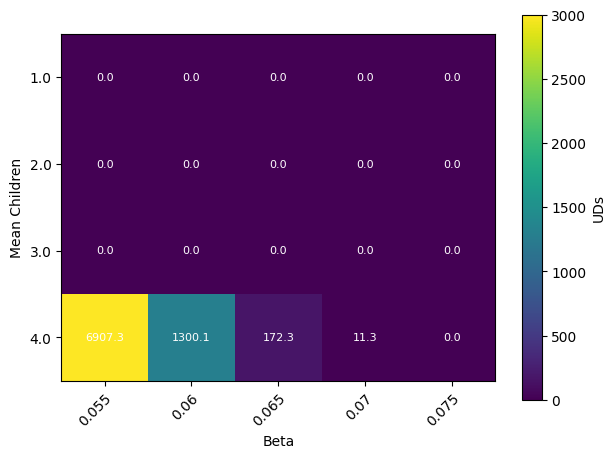

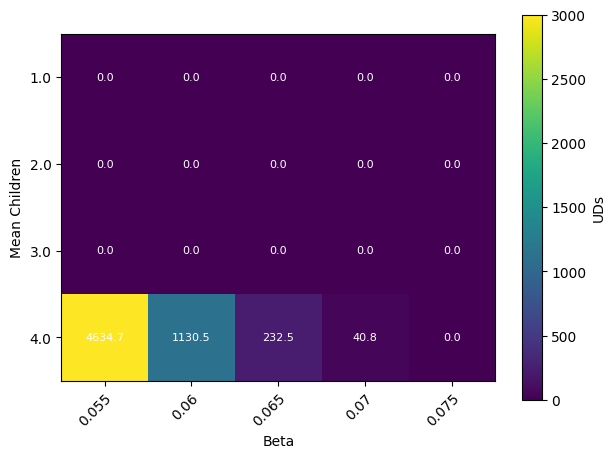

In [19]:
plot_heatmap(uM_datos, ualphas, ubetas, 'Mean Children', 'Beta', 'alive')
plot_heatmap(uM_datos, ualphas, ubetas, 'Mean Children', 'Beta', 'std')

Text(0.5, 0, 'Beta')

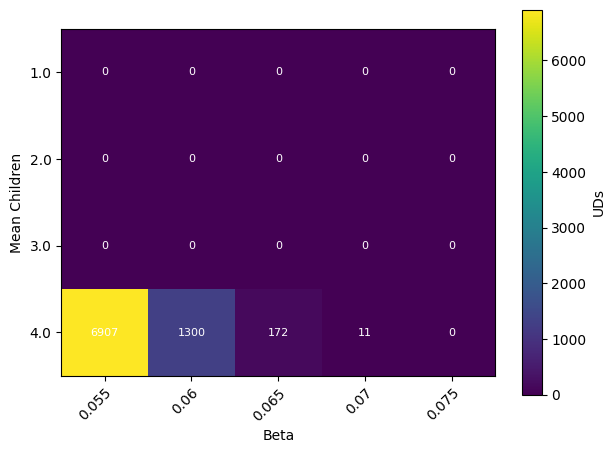

In [5]:
#Heatmap. 
alive_values = np.array([[entry['alive'] for entry in row] for row in uM_datos])
fig,ax = plt.subplots(1,1, figsize=(7, 5), facecolor="white")
IM = ax.imshow(alive_values)
cbar = fig.colorbar(IM, ax=ax, label="UDs")
ax.set_xticks(np.arange(len(ubetas)))
ax.set_yticks(np.arange(len(ualphas)))
ax.set_xticklabels([f'{round(beta, 3)}' for beta in ubetas])
ax.set_yticklabels([f'{alpha:.1f}' for alpha in ualphas])
# Size
for i in range(len(ualphas)):
    for j in range(len(ubetas)):
        ax.text(j, i, f'{alive_values[i, j]:.0f}', ha="center", va="center", color="w", fontsize=8)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylabel("Mean Children")
ax.set_xlabel("Beta")

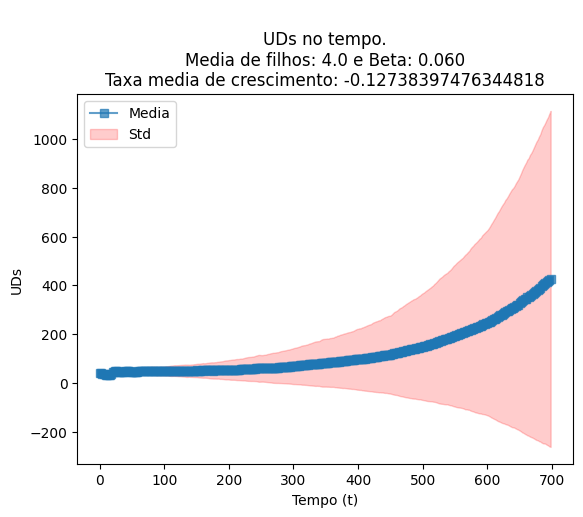

In [74]:
#Graph for each experiment
x = 1
y = 3

# Mean line
plt.plot(uM_behavior[y][x]['tempo'], uM_behavior[y][x]['mean'], 's-', label='Media', alpha=0.7)

# Std
plt.fill_between(uM_behavior[y][x]['tempo'], uM_behavior[y][x]['mean'] - uM_behavior[y][x]['std'],
                 uM_behavior[y][x]['mean'] + uM_behavior[y][x]['std'], color='red', alpha=0.2, label='Std')

plt.xlabel('Tempo (t)')
plt.ylabel('UDs')
plt.title(f'''
UDs no tempo.
Media de filhos: {ualphas[y]} e Beta: {ubetas[x]:.3f}
Taxa media de crescimento: {uM_behavior[y][x]['growth rate']}''')
plt.legend()
plt.show()

## 3. Mean fixed

In [3]:
#This experiment has mean of children: 4
media = 4
n = 40
halphas = np.linspace(10,n,int(n/10)) # Unidades inicias from 10 to 50
hbetas = np.linspace(0.055, 0.075, 5) # Beta from 0.055 to 0.075
hM = np.empty((len(halphas), len(hbetas)), dtype=object)
punto_vista = 2
tiempo = 700
tempo = list(range(0,tiempo,punto_vista))
experiments = 100

start = time.time()
# For data of behaviour
datos_3 = np.empty((len(halphas), len(hbetas)), dtype=object)
print(hM.shape)

for i, iniciais in enumerate(halphas):
    for j, prob_morte  in enumerate(hbetas):
        list_alive_UDs = []
        list_vivas_puntos_vista = []
        tasas_crecimiento = []
        star_configuration = time.time()
        original_media = media
        for experiment in range(1, experiments+1):
            #### Initialization
            print(f'Go with experiment {experiment}')
            clanes = [1,2]
            clans = (clanes * (int(iniciais) // 2)) + clanes[:(int(iniciais) % 2)]
            random.shuffle(clans)
            UD_dual_organization.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_dual_organization(id_ud, media, clans.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_dual_organization.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_dual_organization.uds.values():
                    for _ in range(3):
                        ud.varieties.append(random.choice(initial_varieties))
            # Lists for graphs
            vivas_puntos_vista = [int(iniciais)]
            vivas_tasa_crecimiento = [int(iniciais)]
            mortas_puntos_vista = [0]
            # Simulation
            for t in range(1, tiempo):
                uds_copy = {id_ud: ud for id_ud, ud in UD_dual_organization.uds.items() if ud.activa}
                items = list(uds_copy.items())
                random.shuffle(items)
                uds_copy = dict(items) 
                if not uds_copy:
                    # Only 0
                    #print(f"acabó en el experimento {experiment} de la media {malphas[i]} con unidades {mbetas[j]}")
                    vivas_puntos_vista.extend([0] * (int((tiempo/punto_vista)-(len(vivas_puntos_vista)))))
                    vivas_tasa_crecimiento.extend([0] * (int((tiempo)-(len(vivas_tasa_crecimiento)))))
                    #mortas_puntos_vista.extend([unidades_iniciais] * (tiempo - t))
                    break
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(uds_copy, int(media),0 , True, 0.2)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
                # Collecting data
                vivas_tasa_crecimiento.append(len([ud for id, ud in uds_copy.items() if ud.activa]))
                if t % punto_vista == 0:
                    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
                    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
                    vivas_puntos_vista.append(viv)
#                     mortas_puntos_vista.append(mort)
            # Average Annual Population Growth
            indice_primer_cero = np.where(np.array(vivas_tasa_crecimiento) == 0)[0]
            if len(indice_primer_cero) > 0:
                # Only before 0
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento[:indice_primer_cero[0] - 1]) / vivas_tasa_crecimiento[:-1][:indice_primer_cero[0] - 2] * 100)
            else:
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento) / vivas_tasa_crecimiento[:-1] * 100)
            # Collect the data
            list_alive_UDs.append(len([ud for id, ud in uds_copy.items() if ud.activa == True])) #For heatmap
            list_vivas_puntos_vista.append(vivas_puntos_vista)
            #print(f"""
            #    Acabó la simulacion con media de {int(media)} y {int(iniciais)} unidades iniciales. Prob de morte: {prob_morte}
            #    poblacion total al final de la simulación: {len([ud for id, ud in uds_copy.items() if ud.activa == True])}""")
        media = original_media
        end_config = time.time()
        hM[i][j] = {'alive': np.mean(list_alive_UDs),
                    'std': np.std(list_alive_UDs),
                    'time used': end_config - star_configuration}
        datos_3[i][j] = {'tempo': tempo, 
                         'mean': np.mean(list_vivas_puntos_vista, axis=0), 
                         'std':  np.std(list_vivas_puntos_vista, axis=0),
                         'growth rate': np.mean([np.mean(lista) for lista in tasas_crecimiento])}
        print(f"""
The total time of the configuration of Initial UDs {iniciais} and beta {prob_morte:.3f} is: {end_config - star_configuration}
        """)
# Folders and save
folder_name = 'Kinship_no_control_pop'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Heatmap and std
heat_std = os.path.join(folder_name, 'Dual_Mean_fixed.npy')
np.save(heat_std, hM)
# Behavior of experiments
behavior = os.path.join(folder_name, 'Dual_Mean_fixed_data.npy')
np.save(behavior, datos_3)
now = datetime.now()
finish = time.time()
print(f"""
It finished at: {now}
It lasted {finish-start}
""")
print("done")

(4, 5)
Go with experiment 1
Go with experiment 2
Go with experiment 3
Go with experiment 4
Go with experiment 5
Go with experiment 6
Go with experiment 7
Go with experiment 8
Go with experiment 9
Go with experiment 10
Go with experiment 11
Go with experiment 12
Go with experiment 13
Go with experiment 14
Go with experiment 15
Go with experiment 16
Go with experiment 17
Go with experiment 18
Go with experiment 19
Go with experiment 20
Go with experiment 21
Go with experiment 22
Go with experiment 23
Go with experiment 24
Go with experiment 25
Go with experiment 26
Go with experiment 27
Go with experiment 28
Go with experiment 29
Go with experiment 30
Go with experiment 31
Go with experiment 32
Go with experiment 33
Go with experiment 34
Go with experiment 35
Go with experiment 36
Go with experiment 37
Go with experiment 38
Go with experiment 39
Go with experiment 40
Go with experiment 41
Go with experiment 42
Go with experiment 43
Go with experiment 44
Go with experiment 45
Go with expe

Go with experiment 74
Go with experiment 75
Go with experiment 76
Go with experiment 77
Go with experiment 78
Go with experiment 79
Go with experiment 80
Go with experiment 81
Go with experiment 82
Go with experiment 83
Go with experiment 84
Go with experiment 85
Go with experiment 86
Go with experiment 87
Go with experiment 88
Go with experiment 89
Go with experiment 90
Go with experiment 91
Go with experiment 92
Go with experiment 93
Go with experiment 94
Go with experiment 95
Go with experiment 96
Go with experiment 97
Go with experiment 98
Go with experiment 99
Go with experiment 100

The total time of the configuration of Initial UDs 10.0 and beta 0.070 is: 1.3539543151855469
        
Go with experiment 1
Go with experiment 2
Go with experiment 3
Go with experiment 4
Go with experiment 5
Go with experiment 6
Go with experiment 7
Go with experiment 8
Go with experiment 9
Go with experiment 10
Go with experiment 11
Go with experiment 12
Go with experiment 13
Go with experiment 14
Go

Go with experiment 30
Go with experiment 31
Go with experiment 32
Go with experiment 33
Go with experiment 34
Go with experiment 35
Go with experiment 36
Go with experiment 37
Go with experiment 38
Go with experiment 39
Go with experiment 40
Go with experiment 41
Go with experiment 42
Go with experiment 43
Go with experiment 44
Go with experiment 45
Go with experiment 46
Go with experiment 47
Go with experiment 48
Go with experiment 49
Go with experiment 50
Go with experiment 51
Go with experiment 52
Go with experiment 53
Go with experiment 54
Go with experiment 55
Go with experiment 56
Go with experiment 57
Go with experiment 58
Go with experiment 59
Go with experiment 60
Go with experiment 61
Go with experiment 62
Go with experiment 63
Go with experiment 64
Go with experiment 65
Go with experiment 66
Go with experiment 67
Go with experiment 68
Go with experiment 69
Go with experiment 70
Go with experiment 71
Go with experiment 72
Go with experiment 73
Go with experiment 74
Go with ex

Go with experiment 90
Go with experiment 91
Go with experiment 92
Go with experiment 93
Go with experiment 94
Go with experiment 95
Go with experiment 96
Go with experiment 97
Go with experiment 98
Go with experiment 99
Go with experiment 100

The total time of the configuration of Initial UDs 30.0 and beta 0.055 is: 43178.35819649696
        
Go with experiment 1
Go with experiment 2
Go with experiment 3
Go with experiment 4
Go with experiment 5
Go with experiment 6
Go with experiment 7
Go with experiment 8
Go with experiment 9
Go with experiment 10
Go with experiment 11
Go with experiment 12
Go with experiment 13
Go with experiment 14
Go with experiment 15
Go with experiment 16
Go with experiment 17
Go with experiment 18
Go with experiment 19
Go with experiment 20
Go with experiment 21
Go with experiment 22
Go with experiment 23
Go with experiment 24
Go with experiment 25
Go with experiment 26
Go with experiment 27
Go with experiment 28
Go with experiment 29
Go with experiment 30
Go 

Go with experiment 47
Go with experiment 48
Go with experiment 49
Go with experiment 50
Go with experiment 51
Go with experiment 52
Go with experiment 53
Go with experiment 54
Go with experiment 55
Go with experiment 56
Go with experiment 57
Go with experiment 58
Go with experiment 59
Go with experiment 60
Go with experiment 61
Go with experiment 62
Go with experiment 63
Go with experiment 64
Go with experiment 65
Go with experiment 66
Go with experiment 67
Go with experiment 68
Go with experiment 69
Go with experiment 70
Go with experiment 71
Go with experiment 72
Go with experiment 73
Go with experiment 74
Go with experiment 75
Go with experiment 76
Go with experiment 77
Go with experiment 78
Go with experiment 79
Go with experiment 80
Go with experiment 81
Go with experiment 82
Go with experiment 83
Go with experiment 84
Go with experiment 85
Go with experiment 86
Go with experiment 87
Go with experiment 88
Go with experiment 89
Go with experiment 90
Go with experiment 91
Go with ex

Go with experiment 2
Go with experiment 3
Go with experiment 4
Go with experiment 5
Go with experiment 6
Go with experiment 7
Go with experiment 8
Go with experiment 9
Go with experiment 10
Go with experiment 11
Go with experiment 12
Go with experiment 13
Go with experiment 14
Go with experiment 15
Go with experiment 16
Go with experiment 17
Go with experiment 18
Go with experiment 19
Go with experiment 20
Go with experiment 21
Go with experiment 22
Go with experiment 23
Go with experiment 24
Go with experiment 25
Go with experiment 26
Go with experiment 27
Go with experiment 28
Go with experiment 29
Go with experiment 30
Go with experiment 31
Go with experiment 32
Go with experiment 33
Go with experiment 34
Go with experiment 35
Go with experiment 36
Go with experiment 37
Go with experiment 38
Go with experiment 39
Go with experiment 40
Go with experiment 41
Go with experiment 42
Go with experiment 43
Go with experiment 44
Go with experiment 45
Go with experiment 46
Go with experiment

In [20]:
# Dowload the documents
#As reference
n = 40
halphas = np.linspace(10,n,int(n/10)) # Unidades inicias from 10 to 50
hbetas = np.arange(0.055, 0.07 + 0.005, 0.005) # Beta from 0.045 to 0.075
#Folders
folder_name = 'Kinship_no_control_pop'
heat_std = os.path.join(folder_name, 'Dual_Mean_fixed.npy')
behavior = os.path.join(folder_name, 'Dual_Mean_fixed_data.npy')
## heatmap and mean
hM_datos = np.load(heat_std, allow_pickle=True)
## behavior for experiments
hM_behavior = np.load(behavior, allow_pickle=True)

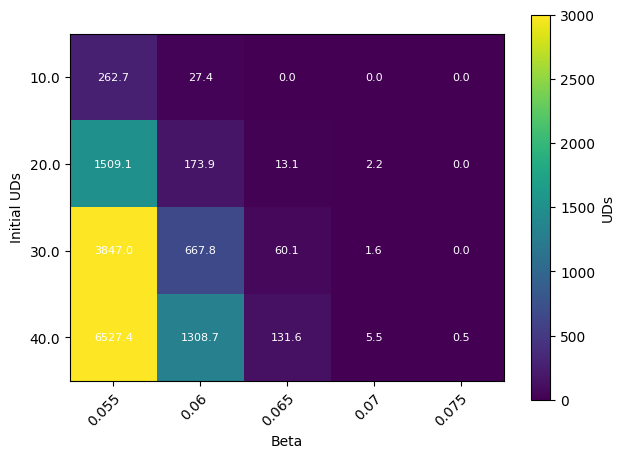

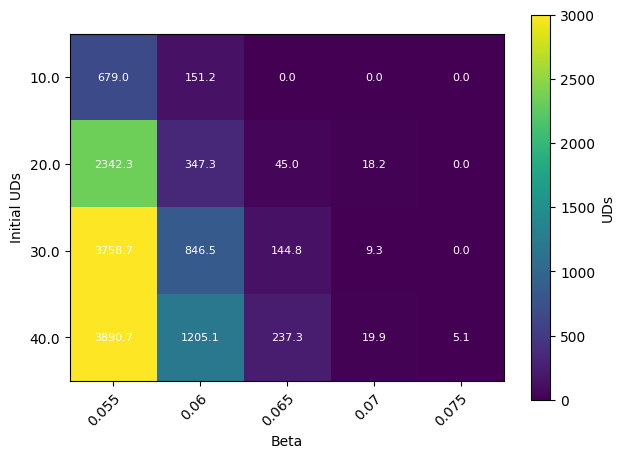

In [21]:
plot_heatmap(hM_datos, halphas, hbetas, 'Initial UDs', 'Beta', 'alive')
plot_heatmap(hM_datos, halphas, hbetas, 'Initial UDs', 'Beta', 'std')

Text(0.5, 0, 'Beta')

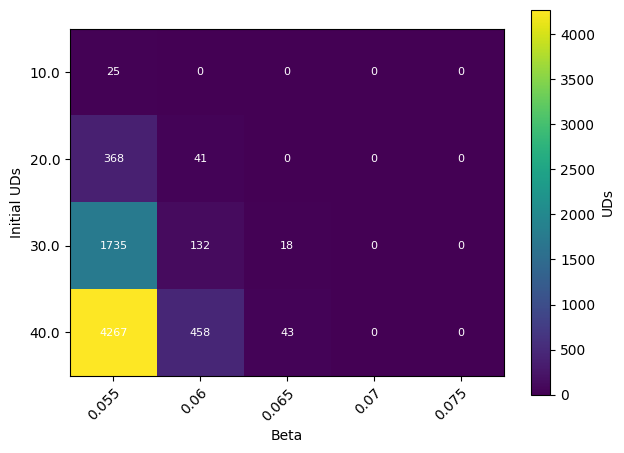

In [72]:
#Heatmap. 
alive_values = np.array([[entry['alive'] for entry in row] for row in hM_datos])
fig,ax = plt.subplots(1,1, figsize=(7, 5), facecolor="white")
IM = ax.imshow(alive_values)
cbar = fig.colorbar(IM, ax=ax, label="UDs")
ax.set_xticks(np.arange(len(hbetas)))
ax.set_yticks(np.arange(len(halphas)))
ax.set_xticklabels([f'{round(beta, 3)}' for beta in hbetas])
ax.set_yticklabels([f'{alpha:.1f}' for alpha in halphas])
for i in range(len(halphas)):
    for j in range(len(hbetas)):
        ax.text(j, i, f'{alive_values[i, j]:.0f}', ha="center", va="center", color="w", fontsize=8)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylabel("Initial UDs")
ax.set_xlabel("Beta")

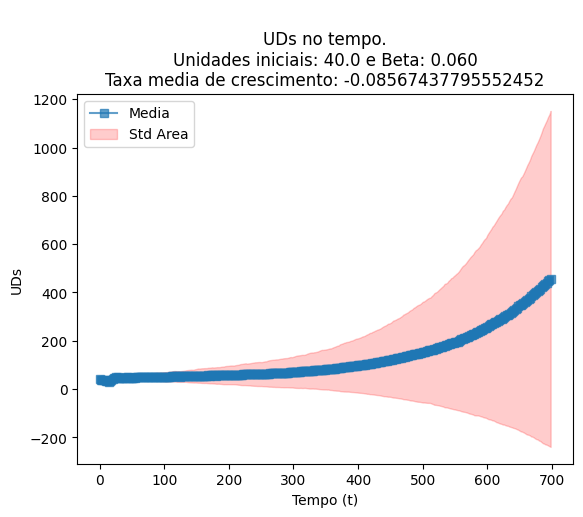

In [71]:
x = 1
y = 3

# MEan line
plt.plot(hM_behavior[y][x]['tempo'], hM_behavior[y][x]['mean'], 's-', label='Media', alpha=0.7)

# Std
plt.fill_between(hM_behavior[y][x]['tempo'], hM_behavior[y][x]['mean'] - hM_behavior[y][x]['std'],
                 hM_behavior[y][x]['mean'] + hM_behavior[y][x]['std'], color='red', alpha=0.2, label='Std Area')

plt.xlabel('Tempo (t)')
plt.ylabel('UDs')
plt.title(f'''
UDs no tempo.
Unidades iniciais: {halphas[y]} e Beta: {hbetas[x]:.3f}
Taxa media de crescimento: {hM_behavior[y][x]['growth rate']}''')
plt.legend()
plt.show()

# Generalized

## 1. Beta fixed

In [8]:
#This experiment has the beta fixed in 0.06
prob_morte = 0.06
n = 4
m = 40
malphas = np.linspace(1,n,n) # Average number of children: from 1 to n
mbetas = np.linspace(10,m,int(m/10)) # Initial UDs: from 10 to m
mM = np.empty((len(malphas), len(mbetas)), dtype=object)
punto_vista = 2
tiempo = 700
tempo = list(range(0,tiempo,punto_vista))
experiments = 120

# For data of behaviour
datos_1 = np.empty((len(malphas), len(mbetas)), dtype=object)
print(mM.shape)
start = time.time()

for i, media in enumerate(malphas):
    for j, iniciais  in enumerate(mbetas):
        list_alive_UDs = []
        list_vivas_puntos_vista = []
        tasas_crecimiento = []
        star_configuration = time.time()
        original_media = media
        for experiment in range(1, experiments+1):
            #### Initialization
            print(f'Go with experiment {experiment}')
            clanes = [1,2,3]
            clans = (clanes * (int(iniciais) // 3)) + clanes[:(int(iniciais) % 3)]# Just 3 clans
            random.shuffle(clans)
            UD_generalized.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_generalized(id_ud, media, clans.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_generalized.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_generalized.uds.values():
                    for _ in range(3):
                        ud.varieties.append(random.choice(initial_varieties))
            # Lists for graphs
            vivas_puntos_vista = [int(iniciais)]
            vivas_tasa_crecimiento = [int(iniciais)]
            mortas_puntos_vista = [0]
            # Simulation
            for t in range(1, tiempo):
                uds_copy = {id_ud: ud for id_ud, ud in UD_generalized.uds.items() if ud.activa}
                items = list(uds_copy.items())
                random.shuffle(items)
                uds_copy = dict(items) 
                if not uds_copy:
                    # Only 0
                    print(f"acabó en el experimento {experiment} de la media {malphas[i]} con unidades {mbetas[j]}")
                    vivas_puntos_vista.extend([0] * (int((tiempo/punto_vista)-(len(vivas_puntos_vista)))))
                    vivas_tasa_crecimiento.extend([0] * (int((tiempo)-(len(vivas_tasa_crecimiento)))))
                    #mortas_puntos_vista.extend([unidades_iniciais] * (tiempo - t))
                    break
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(uds_copy, media, 0, True, 0.2)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
                # Collecting data
                vivas_tasa_crecimiento.append(len([ud for id, ud in uds_copy.items() if ud.activa]))
                if t % punto_vista == 0:
                    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
                    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
                    vivas_puntos_vista.append(viv)
#                     mortas_puntos_vista.append(mort)
#                 if t%100 == 0:
#                     print(f"tamos en tiempo {t} con vivas {viv}")
            # Average Annual Population Growth
            # First 0 avoid errors 
            indice_primer_cero = np.where(np.array(vivas_tasa_crecimiento) == 0)[0]
            if len(indice_primer_cero) > 0:
                # Get growth rate before the 0
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento[:indice_primer_cero[0] - 1]) / vivas_tasa_crecimiento[:-1][:indice_primer_cero[0] - 2] * 100)
            else:
                # Growth rate
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento) / vivas_tasa_crecimiento[:-1] * 100)
            # Collect the data
            list_alive_UDs.append(len([ud for id, ud in uds_copy.items() if ud.activa == True])) #For heatmap
            list_vivas_puntos_vista.append(vivas_puntos_vista)
            #print(f"""
            #    Acabó la simulacion con media de {int(media)} y {int(iniciais)} unidades iniciales. Prob de morte: {prob_morte}
            #    poblacion total al final de la simulación: {len([ud for id, ud in uds_copy.items() if ud.activa == True])}""")
        media = original_media
        end_config = time.time()
        mM[i][j] = {'alive': np.mean(list_alive_UDs),
                    'std': np.std(list_alive_UDs),
                    'time used': end_config - star_configuration}
        datos_1[i][j] = {'tempo': tempo, 
                         'mean': np.mean(list_vivas_puntos_vista, axis=0), 
                         'std':  np.std(list_vivas_puntos_vista, axis=0),
                         'growth rate': np.mean([np.mean(lista) for lista in tasas_crecimiento])}
        print(f"""
The total time of the configuration of mean {media} and initial UDs {iniciais} is  {end_config - star_configuration}
        """)
# Folder
folder_name = 'Kinship_no_control_pop'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Heatmap and std
heat_std = os.path.join(folder_name, 'Generalized_beta_fixed.npy')
np.save(heat_std, mM)
# Behavior of experiments
behavior = os.path.join(folder_name, 'Generalized_beta_fixed_data.npy')
np.save(behavior, datos_1)
now = datetime.now()
finish = time.time()
print(f"""
It finished at: {now}
It lasted {finish-start}
""")
print("done")

(4, 4)
Go with experiment 1
acabó en el experimento 1 de la media 1.0 con unidades 10.0
Go with experiment 2
acabó en el experimento 2 de la media 1.0 con unidades 10.0
Go with experiment 3
acabó en el experimento 3 de la media 1.0 con unidades 10.0
Go with experiment 4
acabó en el experimento 4 de la media 1.0 con unidades 10.0
Go with experiment 5
acabó en el experimento 5 de la media 1.0 con unidades 10.0
Go with experiment 6
acabó en el experimento 6 de la media 1.0 con unidades 10.0
Go with experiment 7
acabó en el experimento 7 de la media 1.0 con unidades 10.0
Go with experiment 8
acabó en el experimento 8 de la media 1.0 con unidades 10.0
Go with experiment 9
acabó en el experimento 9 de la media 1.0 con unidades 10.0
Go with experiment 10
acabó en el experimento 10 de la media 1.0 con unidades 10.0
Go with experiment 11
acabó en el experimento 11 de la media 1.0 con unidades 10.0
Go with experiment 12
acabó en el experimento 12 de la media 1.0 con unidades 10.0
Go with experim

acabó en el experimento 119 de la media 1.0 con unidades 10.0
Go with experiment 120
acabó en el experimento 120 de la media 1.0 con unidades 10.0

The total time of the configuration of mean 1.0 and initial UDs 10.0 is  0.5081408023834229
        
Go with experiment 1
acabó en el experimento 1 de la media 1.0 con unidades 20.0
Go with experiment 2
acabó en el experimento 2 de la media 1.0 con unidades 20.0
Go with experiment 3
acabó en el experimento 3 de la media 1.0 con unidades 20.0
Go with experiment 4
acabó en el experimento 4 de la media 1.0 con unidades 20.0
Go with experiment 5
acabó en el experimento 5 de la media 1.0 con unidades 20.0
Go with experiment 6
acabó en el experimento 6 de la media 1.0 con unidades 20.0
Go with experiment 7
acabó en el experimento 7 de la media 1.0 con unidades 20.0
Go with experiment 8
acabó en el experimento 8 de la media 1.0 con unidades 20.0
Go with experiment 9
acabó en el experimento 9 de la media 1.0 con unidades 20.0
Go with experiment 10


acabó en el experimento 114 de la media 1.0 con unidades 20.0
Go with experiment 115
acabó en el experimento 115 de la media 1.0 con unidades 20.0
Go with experiment 116
acabó en el experimento 116 de la media 1.0 con unidades 20.0
Go with experiment 117
acabó en el experimento 117 de la media 1.0 con unidades 20.0
Go with experiment 118
acabó en el experimento 118 de la media 1.0 con unidades 20.0
Go with experiment 119
acabó en el experimento 119 de la media 1.0 con unidades 20.0
Go with experiment 120
acabó en el experimento 120 de la media 1.0 con unidades 20.0

The total time of the configuration of mean 1.0 and initial UDs 20.0 is  1.0232138633728027
        
Go with experiment 1
acabó en el experimento 1 de la media 1.0 con unidades 30.0
Go with experiment 2
acabó en el experimento 2 de la media 1.0 con unidades 30.0
Go with experiment 3
acabó en el experimento 3 de la media 1.0 con unidades 30.0
Go with experiment 4
acabó en el experimento 4 de la media 1.0 con unidades 30.0
Go

acabó en el experimento 100 de la media 1.0 con unidades 30.0
Go with experiment 101
acabó en el experimento 101 de la media 1.0 con unidades 30.0
Go with experiment 102
acabó en el experimento 102 de la media 1.0 con unidades 30.0
Go with experiment 103
acabó en el experimento 103 de la media 1.0 con unidades 30.0
Go with experiment 104
acabó en el experimento 104 de la media 1.0 con unidades 30.0
Go with experiment 105
acabó en el experimento 105 de la media 1.0 con unidades 30.0
Go with experiment 106
acabó en el experimento 106 de la media 1.0 con unidades 30.0
Go with experiment 107
acabó en el experimento 107 de la media 1.0 con unidades 30.0
Go with experiment 108
acabó en el experimento 108 de la media 1.0 con unidades 30.0
Go with experiment 109
acabó en el experimento 109 de la media 1.0 con unidades 30.0
Go with experiment 110
acabó en el experimento 110 de la media 1.0 con unidades 30.0
Go with experiment 111
acabó en el experimento 111 de la media 1.0 con unidades 30.0
Go 

Go with experiment 87
acabó en el experimento 87 de la media 1.0 con unidades 40.0
Go with experiment 88
acabó en el experimento 88 de la media 1.0 con unidades 40.0
Go with experiment 89
acabó en el experimento 89 de la media 1.0 con unidades 40.0
Go with experiment 90
acabó en el experimento 90 de la media 1.0 con unidades 40.0
Go with experiment 91
acabó en el experimento 91 de la media 1.0 con unidades 40.0
Go with experiment 92
acabó en el experimento 92 de la media 1.0 con unidades 40.0
Go with experiment 93
acabó en el experimento 93 de la media 1.0 con unidades 40.0
Go with experiment 94
acabó en el experimento 94 de la media 1.0 con unidades 40.0
Go with experiment 95
acabó en el experimento 95 de la media 1.0 con unidades 40.0
Go with experiment 96
acabó en el experimento 96 de la media 1.0 con unidades 40.0
Go with experiment 97
acabó en el experimento 97 de la media 1.0 con unidades 40.0
Go with experiment 98
acabó en el experimento 98 de la media 1.0 con unidades 40.0
Go w

acabó en el experimento 72 de la media 2.0 con unidades 10.0
Go with experiment 73
acabó en el experimento 73 de la media 2.0 con unidades 10.0
Go with experiment 74
acabó en el experimento 74 de la media 2.0 con unidades 10.0
Go with experiment 75
acabó en el experimento 75 de la media 2.0 con unidades 10.0
Go with experiment 76
acabó en el experimento 76 de la media 2.0 con unidades 10.0
Go with experiment 77
acabó en el experimento 77 de la media 2.0 con unidades 10.0
Go with experiment 78
acabó en el experimento 78 de la media 2.0 con unidades 10.0
Go with experiment 79
acabó en el experimento 79 de la media 2.0 con unidades 10.0
Go with experiment 80
acabó en el experimento 80 de la media 2.0 con unidades 10.0
Go with experiment 81
acabó en el experimento 81 de la media 2.0 con unidades 10.0
Go with experiment 82
acabó en el experimento 82 de la media 2.0 con unidades 10.0
Go with experiment 83
acabó en el experimento 83 de la media 2.0 con unidades 10.0
Go with experiment 84
acab

acabó en el experimento 63 de la media 2.0 con unidades 20.0
Go with experiment 64
acabó en el experimento 64 de la media 2.0 con unidades 20.0
Go with experiment 65
acabó en el experimento 65 de la media 2.0 con unidades 20.0
Go with experiment 66
acabó en el experimento 66 de la media 2.0 con unidades 20.0
Go with experiment 67
acabó en el experimento 67 de la media 2.0 con unidades 20.0
Go with experiment 68
acabó en el experimento 68 de la media 2.0 con unidades 20.0
Go with experiment 69
acabó en el experimento 69 de la media 2.0 con unidades 20.0
Go with experiment 70
acabó en el experimento 70 de la media 2.0 con unidades 20.0
Go with experiment 71
acabó en el experimento 71 de la media 2.0 con unidades 20.0
Go with experiment 72
acabó en el experimento 72 de la media 2.0 con unidades 20.0
Go with experiment 73
acabó en el experimento 73 de la media 2.0 con unidades 20.0
Go with experiment 74
acabó en el experimento 74 de la media 2.0 con unidades 20.0
Go with experiment 75
acab

Go with experiment 44
acabó en el experimento 44 de la media 2.0 con unidades 30.0
Go with experiment 45
acabó en el experimento 45 de la media 2.0 con unidades 30.0
Go with experiment 46
acabó en el experimento 46 de la media 2.0 con unidades 30.0
Go with experiment 47
acabó en el experimento 47 de la media 2.0 con unidades 30.0
Go with experiment 48
acabó en el experimento 48 de la media 2.0 con unidades 30.0
Go with experiment 49
acabó en el experimento 49 de la media 2.0 con unidades 30.0
Go with experiment 50
acabó en el experimento 50 de la media 2.0 con unidades 30.0
Go with experiment 51
acabó en el experimento 51 de la media 2.0 con unidades 30.0
Go with experiment 52
acabó en el experimento 52 de la media 2.0 con unidades 30.0
Go with experiment 53
acabó en el experimento 53 de la media 2.0 con unidades 30.0
Go with experiment 54
acabó en el experimento 54 de la media 2.0 con unidades 30.0
Go with experiment 55
acabó en el experimento 55 de la media 2.0 con unidades 30.0
Go w

acabó en el experimento 21 de la media 2.0 con unidades 40.0
Go with experiment 22
acabó en el experimento 22 de la media 2.0 con unidades 40.0
Go with experiment 23
acabó en el experimento 23 de la media 2.0 con unidades 40.0
Go with experiment 24
acabó en el experimento 24 de la media 2.0 con unidades 40.0
Go with experiment 25
acabó en el experimento 25 de la media 2.0 con unidades 40.0
Go with experiment 26
acabó en el experimento 26 de la media 2.0 con unidades 40.0
Go with experiment 27
acabó en el experimento 27 de la media 2.0 con unidades 40.0
Go with experiment 28
acabó en el experimento 28 de la media 2.0 con unidades 40.0
Go with experiment 29
acabó en el experimento 29 de la media 2.0 con unidades 40.0
Go with experiment 30
acabó en el experimento 30 de la media 2.0 con unidades 40.0
Go with experiment 31
acabó en el experimento 31 de la media 2.0 con unidades 40.0
Go with experiment 32
acabó en el experimento 32 de la media 2.0 con unidades 40.0
Go with experiment 33
acab

Go with experiment 3
acabó en el experimento 3 de la media 3.0 con unidades 10.0
Go with experiment 4
acabó en el experimento 4 de la media 3.0 con unidades 10.0
Go with experiment 5
acabó en el experimento 5 de la media 3.0 con unidades 10.0
Go with experiment 6
acabó en el experimento 6 de la media 3.0 con unidades 10.0
Go with experiment 7
acabó en el experimento 7 de la media 3.0 con unidades 10.0
Go with experiment 8
acabó en el experimento 8 de la media 3.0 con unidades 10.0
Go with experiment 9
acabó en el experimento 9 de la media 3.0 con unidades 10.0
Go with experiment 10
acabó en el experimento 10 de la media 3.0 con unidades 10.0
Go with experiment 11
acabó en el experimento 11 de la media 3.0 con unidades 10.0
Go with experiment 12
acabó en el experimento 12 de la media 3.0 con unidades 10.0
Go with experiment 13
acabó en el experimento 13 de la media 3.0 con unidades 10.0
Go with experiment 14
acabó en el experimento 14 de la media 3.0 con unidades 10.0
Go with experiment

acabó en el experimento 114 de la media 3.0 con unidades 10.0
Go with experiment 115
acabó en el experimento 115 de la media 3.0 con unidades 10.0
Go with experiment 116
acabó en el experimento 116 de la media 3.0 con unidades 10.0
Go with experiment 117
acabó en el experimento 117 de la media 3.0 con unidades 10.0
Go with experiment 118
acabó en el experimento 118 de la media 3.0 con unidades 10.0
Go with experiment 119
acabó en el experimento 119 de la media 3.0 con unidades 10.0
Go with experiment 120
acabó en el experimento 120 de la media 3.0 con unidades 10.0

The total time of the configuration of mean 3.0 and initial UDs 10.0 is  0.9624300003051758
        
Go with experiment 1
acabó en el experimento 1 de la media 3.0 con unidades 20.0
Go with experiment 2
acabó en el experimento 2 de la media 3.0 con unidades 20.0
Go with experiment 3
acabó en el experimento 3 de la media 3.0 con unidades 20.0
Go with experiment 4
acabó en el experimento 4 de la media 3.0 con unidades 20.0
Go

acabó en el experimento 98 de la media 3.0 con unidades 20.0
Go with experiment 99
acabó en el experimento 99 de la media 3.0 con unidades 20.0
Go with experiment 100
acabó en el experimento 100 de la media 3.0 con unidades 20.0
Go with experiment 101
acabó en el experimento 101 de la media 3.0 con unidades 20.0
Go with experiment 102
acabó en el experimento 102 de la media 3.0 con unidades 20.0
Go with experiment 103
acabó en el experimento 103 de la media 3.0 con unidades 20.0
Go with experiment 104
acabó en el experimento 104 de la media 3.0 con unidades 20.0
Go with experiment 105
acabó en el experimento 105 de la media 3.0 con unidades 20.0
Go with experiment 106
acabó en el experimento 106 de la media 3.0 con unidades 20.0
Go with experiment 107
acabó en el experimento 107 de la media 3.0 con unidades 20.0
Go with experiment 108
acabó en el experimento 108 de la media 3.0 con unidades 20.0
Go with experiment 109
acabó en el experimento 109 de la media 3.0 con unidades 20.0
Go wit

acabó en el experimento 79 de la media 3.0 con unidades 30.0
Go with experiment 80
acabó en el experimento 80 de la media 3.0 con unidades 30.0
Go with experiment 81
acabó en el experimento 81 de la media 3.0 con unidades 30.0
Go with experiment 82
acabó en el experimento 82 de la media 3.0 con unidades 30.0
Go with experiment 83
acabó en el experimento 83 de la media 3.0 con unidades 30.0
Go with experiment 84
acabó en el experimento 84 de la media 3.0 con unidades 30.0
Go with experiment 85
acabó en el experimento 85 de la media 3.0 con unidades 30.0
Go with experiment 86
acabó en el experimento 86 de la media 3.0 con unidades 30.0
Go with experiment 87
acabó en el experimento 87 de la media 3.0 con unidades 30.0
Go with experiment 88
acabó en el experimento 88 de la media 3.0 con unidades 30.0
Go with experiment 89
acabó en el experimento 89 de la media 3.0 con unidades 30.0
Go with experiment 90
acabó en el experimento 90 de la media 3.0 con unidades 30.0
Go with experiment 91
acab

acabó en el experimento 59 de la media 3.0 con unidades 40.0
Go with experiment 60
acabó en el experimento 60 de la media 3.0 con unidades 40.0
Go with experiment 61
acabó en el experimento 61 de la media 3.0 con unidades 40.0
Go with experiment 62
acabó en el experimento 62 de la media 3.0 con unidades 40.0
Go with experiment 63
acabó en el experimento 63 de la media 3.0 con unidades 40.0
Go with experiment 64
acabó en el experimento 64 de la media 3.0 con unidades 40.0
Go with experiment 65
acabó en el experimento 65 de la media 3.0 con unidades 40.0
Go with experiment 66
acabó en el experimento 66 de la media 3.0 con unidades 40.0
Go with experiment 67
acabó en el experimento 67 de la media 3.0 con unidades 40.0
Go with experiment 68
acabó en el experimento 68 de la media 3.0 con unidades 40.0
Go with experiment 69
acabó en el experimento 69 de la media 3.0 con unidades 40.0
Go with experiment 70
acabó en el experimento 70 de la media 3.0 con unidades 40.0
Go with experiment 71
acab

acabó en el experimento 46 de la media 4.0 con unidades 10.0
Go with experiment 47
acabó en el experimento 47 de la media 4.0 con unidades 10.0
Go with experiment 48
acabó en el experimento 48 de la media 4.0 con unidades 10.0
Go with experiment 49
acabó en el experimento 49 de la media 4.0 con unidades 10.0
Go with experiment 50
acabó en el experimento 50 de la media 4.0 con unidades 10.0
Go with experiment 51
acabó en el experimento 51 de la media 4.0 con unidades 10.0
Go with experiment 52
acabó en el experimento 52 de la media 4.0 con unidades 10.0
Go with experiment 53
acabó en el experimento 53 de la media 4.0 con unidades 10.0
Go with experiment 54
acabó en el experimento 54 de la media 4.0 con unidades 10.0
Go with experiment 55
acabó en el experimento 55 de la media 4.0 con unidades 10.0
Go with experiment 56
acabó en el experimento 56 de la media 4.0 con unidades 10.0
Go with experiment 57
acabó en el experimento 57 de la media 4.0 con unidades 10.0
Go with experiment 58
acab

acabó en el experimento 24 de la media 4.0 con unidades 20.0
Go with experiment 25
acabó en el experimento 25 de la media 4.0 con unidades 20.0
Go with experiment 26
acabó en el experimento 26 de la media 4.0 con unidades 20.0
Go with experiment 27
Go with experiment 28
acabó en el experimento 28 de la media 4.0 con unidades 20.0
Go with experiment 29
acabó en el experimento 29 de la media 4.0 con unidades 20.0
Go with experiment 30
acabó en el experimento 30 de la media 4.0 con unidades 20.0
Go with experiment 31
acabó en el experimento 31 de la media 4.0 con unidades 20.0
Go with experiment 32
acabó en el experimento 32 de la media 4.0 con unidades 20.0
Go with experiment 33
acabó en el experimento 33 de la media 4.0 con unidades 20.0
Go with experiment 34
acabó en el experimento 34 de la media 4.0 con unidades 20.0
Go with experiment 35
acabó en el experimento 35 de la media 4.0 con unidades 20.0
Go with experiment 36
acabó en el experimento 36 de la media 4.0 con unidades 20.0
Go w

Go with experiment 13
acabó en el experimento 13 de la media 4.0 con unidades 30.0
Go with experiment 14
acabó en el experimento 14 de la media 4.0 con unidades 30.0
Go with experiment 15
Go with experiment 16
acabó en el experimento 16 de la media 4.0 con unidades 30.0
Go with experiment 17
acabó en el experimento 17 de la media 4.0 con unidades 30.0
Go with experiment 18
Go with experiment 19
Go with experiment 20
acabó en el experimento 20 de la media 4.0 con unidades 30.0
Go with experiment 21
acabó en el experimento 21 de la media 4.0 con unidades 30.0
Go with experiment 22
acabó en el experimento 22 de la media 4.0 con unidades 30.0
Go with experiment 23
Go with experiment 24
acabó en el experimento 24 de la media 4.0 con unidades 30.0
Go with experiment 25
acabó en el experimento 25 de la media 4.0 con unidades 30.0
Go with experiment 26
acabó en el experimento 26 de la media 4.0 con unidades 30.0
Go with experiment 27
acabó en el experimento 27 de la media 4.0 con unidades 30.0

Go with experiment 30
acabó en el experimento 30 de la media 4.0 con unidades 40.0
Go with experiment 31
acabó en el experimento 31 de la media 4.0 con unidades 40.0
Go with experiment 32
Go with experiment 33
acabó en el experimento 33 de la media 4.0 con unidades 40.0
Go with experiment 34
acabó en el experimento 34 de la media 4.0 con unidades 40.0
Go with experiment 35
acabó en el experimento 35 de la media 4.0 con unidades 40.0
Go with experiment 36
Go with experiment 37
acabó en el experimento 37 de la media 4.0 con unidades 40.0
Go with experiment 38
Go with experiment 39
Go with experiment 40
Go with experiment 41
acabó en el experimento 41 de la media 4.0 con unidades 40.0
Go with experiment 42
Go with experiment 43
Go with experiment 44
Go with experiment 45
Go with experiment 46
acabó en el experimento 46 de la media 4.0 con unidades 40.0
Go with experiment 47
Go with experiment 48
acabó en el experimento 48 de la media 4.0 con unidades 40.0
Go with experiment 49
Go with exp

In [22]:
# Dowload the documents
#As a reference
n = 4
m = 40
malphas = np.linspace(1,n,n) # Average number of children: from 1 to n
mbetas = np.linspace(10,m,int(m/10)) # Initial UDs: from 10 to m
#Folders
folder_name = 'Kinship_no_control_pop'
heat_std = os.path.join(folder_name, 'Generalized_beta_fixed.npy')
behavior = os.path.join(folder_name, 'Generalized_beta_fixed_data.npy')
## heatmap and mean
mM_datos = np.load(heat_std, allow_pickle=True)
## behavior for experiments
mM_behavior = np.load(behavior, allow_pickle=True)

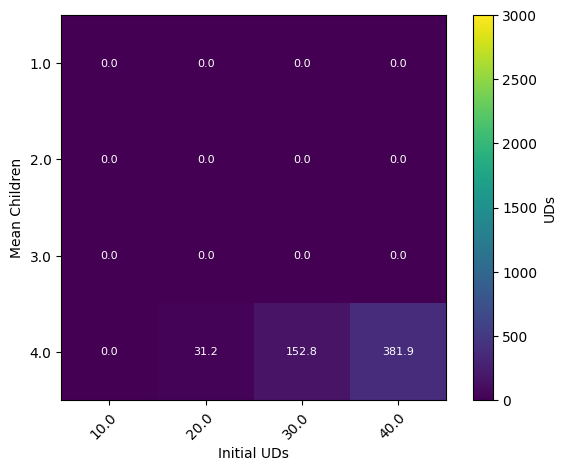

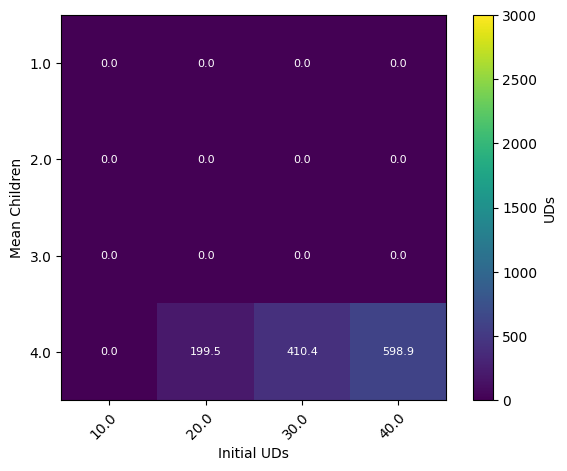

In [23]:
plot_heatmap(mM_datos, malphas, mbetas, 'Mean Children', 'Initial UDs', 'alive')
plot_heatmap(mM_datos, malphas, mbetas, 'Mean Children', 'Initial UDs', 'std')

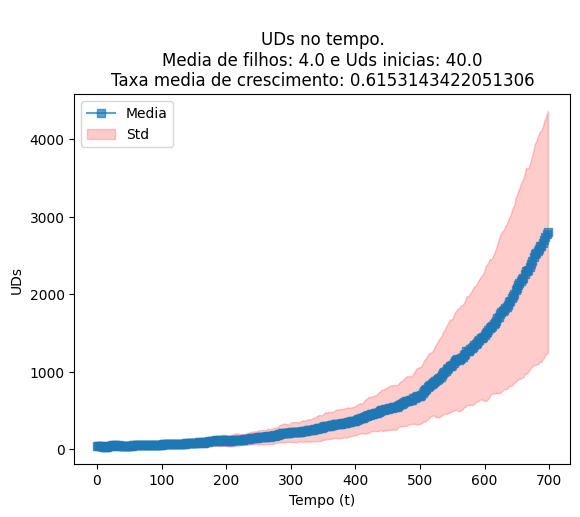

In [68]:
#Graph of experiment with mean and std
x = 3
y = 3

# Main line
plt.plot(mM_behavior[y][x]['tempo'], mM_behavior[y][x]['mean'], 's-', label='Media', alpha=0.7)

# Std
plt.fill_between(mM_behavior[y][x]['tempo'], mM_behavior[y][x]['mean'] - mM_behavior[y][x]['std'],
                 mM_behavior[y][x]['mean'] + mM_behavior[y][x]['std'], color='red', alpha=0.2, label='Std')

plt.xlabel('Tempo (t)')
plt.ylabel('UDs')
plt.title(f'''
UDs no tempo.
Media de filhos: {malphas[y]} e Uds inicias: {mbetas[x]}
Taxa media de crescimento: {mM_behavior[y][x]['growth rate']}''')
plt.legend()
plt.show()

## 2. UDs fixed

In [11]:
#This experiment has Uds inicias in 40
iniciais = 40
n = 4
ualphas = np.linspace(1,n,n) # Average number of children: from 1 to n
ubetas = np.linspace(0.055, 0.075, 5) # Beta from 0.055 to 0.075
uM = np.empty((len(ualphas), len(ubetas)), dtype=object)
punto_vista = 2
tiempo = 700
tempo = list(range(0,tiempo,punto_vista))
experiments = 100

start = time.time()
# For data of behaviour
datos_2 = np.empty((len(ualphas), len(ubetas)), dtype=object)
print(uM.shape)

for i, media in enumerate(ualphas):
    for j, prob_morte  in enumerate(ubetas):
        list_alive_UDs = []
        list_vivas_puntos_vista = []
        tasas_crecimiento = []
        star_configuration = time.time()
        original_media = media
        for experiment in range(1, experiments+1):
            #### Initialization
            print(f'Go with experiment {experiment}')
            clanes = [1,2,3]
            clans = (clanes * (int(iniciais) // 3)) + clanes[:(int(iniciais) % 3)]# Just 3 clans
            random.shuffle(clans)
            UD_generalized.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_generalized(id_ud, media, clans.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_generalized.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_generalized.uds.values():
                    for _ in range(3):
                        ud.varieties.append(random.choice(initial_varieties))
            # Lists for graphs
            vivas_puntos_vista = [int(iniciais)]
            vivas_tasa_crecimiento = [int(iniciais)]
            mortas_puntos_vista = [0]
            # Simulation
            for t in range(1, tiempo):
                uds_copy = {id_ud: ud for id_ud, ud in UD_generalized.uds.items() if ud.activa}
                items = list(uds_copy.items())
                random.shuffle(items)
                uds_copy = dict(items) 
                if not uds_copy:
                    # Only 0
                    #print(f"acabó en el experimento {experiment} de la media {malphas[i]} con unidades {mbetas[j]}")
                    vivas_puntos_vista.extend([0] * (int((tiempo/punto_vista)-(len(vivas_puntos_vista)))))
                    vivas_tasa_crecimiento.extend([0] * (int((tiempo)-(len(vivas_tasa_crecimiento)))))
                    #mortas_puntos_vista.extend([unidades_iniciais] * (tiempo - t))
                    break
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(uds_copy, media, 0, True, 0.2)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
                # Collecting data
                vivas_tasa_crecimiento.append(len([ud for id, ud in uds_copy.items() if ud.activa]))
                if t % punto_vista == 0:
                    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
                    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
                    vivas_puntos_vista.append(viv)
#                     mortas_puntos_vista.append(mort)
            # Average Annual Population Growth
            indice_primer_cero = np.where(np.array(vivas_tasa_crecimiento) == 0)[0]
            if len(indice_primer_cero) > 0:
                # Only before 0
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento[:indice_primer_cero[0] - 1]) / vivas_tasa_crecimiento[:-1][:indice_primer_cero[0] - 2] * 100)
            else:
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento) / vivas_tasa_crecimiento[:-1] * 100)
            # Collect the data
            list_alive_UDs.append(len([ud for id, ud in uds_copy.items() if ud.activa == True])) #For heatmap
            list_vivas_puntos_vista.append(vivas_puntos_vista)
            #print(f"""
            #    Acabó la simulacion con media de {int(media)} y {int(iniciais)} unidades iniciales. Prob de morte: {prob_morte}
            #    poblacion total al final de la simulación: {len([ud for id, ud in uds_copy.items() if ud.activa == True])}""")
        media = original_media
        end_config = time.time()
        uM[i][j] = {'alive': np.mean(list_alive_UDs),
                    'std': np.std(list_alive_UDs),
                    'time used': end_config - star_configuration}
        datos_2[i][j] = {'tempo': tempo, 
                         'mean': np.mean(list_vivas_puntos_vista, axis=0), 
                         'std':  np.std(list_vivas_puntos_vista, axis=0),
                         'growth rate': np.mean([np.mean(lista) for lista in tasas_crecimiento])}
        print(f"""
The total time of the configuration of mean {original_media} and beta {prob_morte:.3f} is  {end_config - star_configuration}
        """)
# Folders and save
folder_name = 'Kinship_no_control_pop'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Heatmap and std
heat_std = os.path.join(folder_name, 'Generalized_UDin_fixed.npy')
np.save(heat_std, uM)
# Behavior of experiments
behavior = os.path.join(folder_name, 'Generalized_Udin_fixed_data.npy')
np.save(behavior, datos_2)
now = datetime.now()
finish = time.time()
print(f"""
It finished at: {now}
It lasted {finish-start}
""")
print("done")

(4, 5)
Go with experiment 1
Go with experiment 2
Go with experiment 3
Go with experiment 4
Go with experiment 5
Go with experiment 6
Go with experiment 7
Go with experiment 8
Go with experiment 9
Go with experiment 10
Go with experiment 11
Go with experiment 12
Go with experiment 13
Go with experiment 14
Go with experiment 15
Go with experiment 16
Go with experiment 17
Go with experiment 18
Go with experiment 19
Go with experiment 20
Go with experiment 21
Go with experiment 22
Go with experiment 23
Go with experiment 24
Go with experiment 25
Go with experiment 26
Go with experiment 27
Go with experiment 28
Go with experiment 29
Go with experiment 30
Go with experiment 31
Go with experiment 32
Go with experiment 33
Go with experiment 34
Go with experiment 35
Go with experiment 36
Go with experiment 37
Go with experiment 38
Go with experiment 39
Go with experiment 40
Go with experiment 41
Go with experiment 42
Go with experiment 43
Go with experiment 44
Go with experiment 45
Go with expe

Go with experiment 77
Go with experiment 78
Go with experiment 79
Go with experiment 80
Go with experiment 81
Go with experiment 82
Go with experiment 83
Go with experiment 84
Go with experiment 85
Go with experiment 86
Go with experiment 87
Go with experiment 88
Go with experiment 89
Go with experiment 90
Go with experiment 91
Go with experiment 92
Go with experiment 93
Go with experiment 94
Go with experiment 95
Go with experiment 96
Go with experiment 97
Go with experiment 98
Go with experiment 99
Go with experiment 100

The total time of the configuration of mean 1.0 and beta 0.070 is  1.6252570152282715
        
Go with experiment 1
Go with experiment 2
Go with experiment 3
Go with experiment 4
Go with experiment 5
Go with experiment 6
Go with experiment 7
Go with experiment 8
Go with experiment 9
Go with experiment 10
Go with experiment 11
Go with experiment 12
Go with experiment 13
Go with experiment 14
Go with experiment 15
Go with experiment 16
Go with experiment 17
Go with ex

Go with experiment 34
Go with experiment 35
Go with experiment 36
Go with experiment 37
Go with experiment 38
Go with experiment 39
Go with experiment 40
Go with experiment 41
Go with experiment 42
Go with experiment 43
Go with experiment 44
Go with experiment 45
Go with experiment 46
Go with experiment 47
Go with experiment 48
Go with experiment 49
Go with experiment 50
Go with experiment 51
Go with experiment 52
Go with experiment 53
Go with experiment 54
Go with experiment 55
Go with experiment 56
Go with experiment 57
Go with experiment 58
Go with experiment 59
Go with experiment 60
Go with experiment 61
Go with experiment 62
Go with experiment 63
Go with experiment 64
Go with experiment 65
Go with experiment 66
Go with experiment 67
Go with experiment 68
Go with experiment 69
Go with experiment 70
Go with experiment 71
Go with experiment 72
Go with experiment 73
Go with experiment 74
Go with experiment 75
Go with experiment 76
Go with experiment 77
Go with experiment 78
Go with ex

Go with experiment 95
Go with experiment 96
Go with experiment 97
Go with experiment 98
Go with experiment 99
Go with experiment 100

The total time of the configuration of mean 3.0 and beta 0.055 is  14.446468591690063
        
Go with experiment 1
Go with experiment 2
Go with experiment 3
Go with experiment 4
Go with experiment 5
Go with experiment 6
Go with experiment 7
Go with experiment 8
Go with experiment 9
Go with experiment 10
Go with experiment 11
Go with experiment 12
Go with experiment 13
Go with experiment 14
Go with experiment 15
Go with experiment 16
Go with experiment 17
Go with experiment 18
Go with experiment 19
Go with experiment 20
Go with experiment 21
Go with experiment 22
Go with experiment 23
Go with experiment 24
Go with experiment 25
Go with experiment 26
Go with experiment 27
Go with experiment 28
Go with experiment 29
Go with experiment 30
Go with experiment 31
Go with experiment 32
Go with experiment 33
Go with experiment 34
Go with experiment 35
Go with ex

Go with experiment 52
Go with experiment 53
Go with experiment 54
Go with experiment 55
Go with experiment 56
Go with experiment 57
Go with experiment 58
Go with experiment 59
Go with experiment 60
Go with experiment 61
Go with experiment 62
Go with experiment 63
Go with experiment 64
Go with experiment 65
Go with experiment 66
Go with experiment 67
Go with experiment 68
Go with experiment 69
Go with experiment 70
Go with experiment 71
Go with experiment 72
Go with experiment 73
Go with experiment 74
Go with experiment 75
Go with experiment 76
Go with experiment 77
Go with experiment 78
Go with experiment 79
Go with experiment 80
Go with experiment 81
Go with experiment 82
Go with experiment 83
Go with experiment 84
Go with experiment 85
Go with experiment 86
Go with experiment 87
Go with experiment 88
Go with experiment 89
Go with experiment 90
Go with experiment 91
Go with experiment 92
Go with experiment 93
Go with experiment 94
Go with experiment 95
Go with experiment 96
Go with ex

Go with experiment 11
Go with experiment 12
Go with experiment 13
Go with experiment 14
Go with experiment 15
Go with experiment 16
Go with experiment 17
Go with experiment 18
Go with experiment 19
Go with experiment 20
Go with experiment 21
Go with experiment 22
Go with experiment 23
Go with experiment 24
Go with experiment 25
Go with experiment 26
Go with experiment 27
Go with experiment 28
Go with experiment 29
Go with experiment 30
Go with experiment 31
Go with experiment 32
Go with experiment 33
Go with experiment 34
Go with experiment 35
Go with experiment 36
Go with experiment 37
Go with experiment 38
Go with experiment 39
Go with experiment 40
Go with experiment 41
Go with experiment 42
Go with experiment 43
Go with experiment 44
Go with experiment 45
Go with experiment 46
Go with experiment 47
Go with experiment 48
Go with experiment 49
Go with experiment 50
Go with experiment 51
Go with experiment 52
Go with experiment 53
Go with experiment 54
Go with experiment 55
Go with ex

In [24]:
# Dowload the documents
#As reference
n = 4
ualphas = np.linspace(1,n,n) # Average number of children: from 1 to n
ubetas = np.arange(0.055, 0.07 + 0.005, 0.005) # Beta from 0.045 to 0.075
#Folders
folder_name = 'Kinship_no_control_pop'
heat_std = os.path.join(folder_name, 'Generalized_UDin_fixed.npy')
behavior = os.path.join(folder_name, 'Generalized_UDin_fixed_data.npy')
## heatmap and mean
uM_datos = np.load(heat_std, allow_pickle=True)
## behavior for experiments
uM_behavior = np.load(behavior, allow_pickle=True)

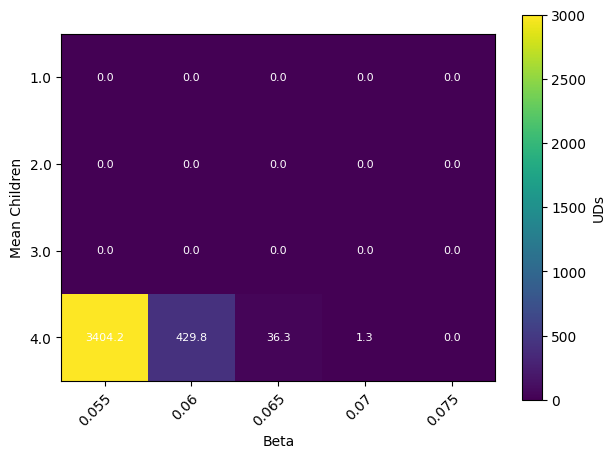

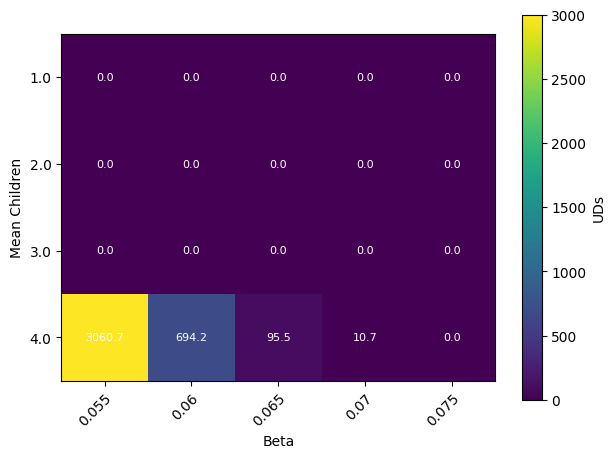

In [25]:
plot_heatmap(uM_datos, ualphas, ubetas, 'Mean Children', 'Beta', 'alive')
plot_heatmap(uM_datos, ualphas, ubetas, 'Mean Children', 'Beta', 'std')

Text(0.5, 0, 'Beta')

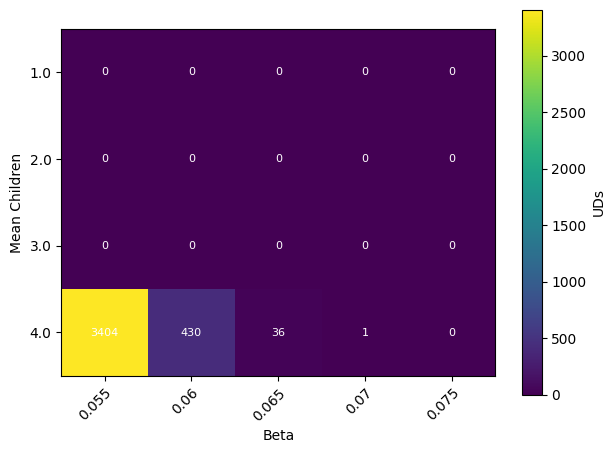

In [13]:
#Heatmap. 
alive_values = np.array([[entry['alive'] for entry in row] for row in uM_datos])
fig,ax = plt.subplots(1,1, figsize=(7, 5), facecolor="white")
IM = ax.imshow(alive_values)
cbar = fig.colorbar(IM, ax=ax, label="UDs")
ax.set_xticks(np.arange(len(ubetas)))
ax.set_yticks(np.arange(len(ualphas)))
ax.set_xticklabels([f'{round(beta, 3)}' for beta in ubetas])
ax.set_yticklabels([f'{alpha:.1f}' for alpha in ualphas])
# Size
for i in range(len(ualphas)):
    for j in range(len(ubetas)):
        ax.text(j, i, f'{alive_values[i, j]:.0f}', ha="center", va="center", color="w", fontsize=8)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylabel("Mean Children")
ax.set_xlabel("Beta")

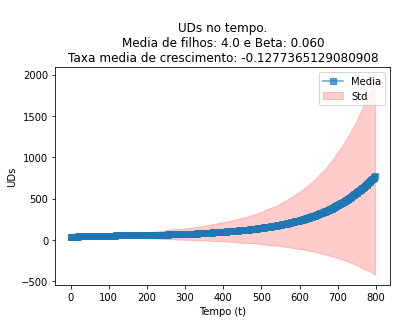

In [4]:
#Graph for each experiment
x = 1
y = 3

# Mean line
plt.plot(uM_behavior[y][x]['tempo'], uM_behavior[y][x]['mean'], 's-', label='Media', alpha=0.7)

# Std
plt.fill_between(uM_behavior[y][x]['tempo'], uM_behavior[y][x]['mean'] - uM_behavior[y][x]['std'],
                 uM_behavior[y][x]['mean'] + uM_behavior[y][x]['std'], color='red', alpha=0.2, label='Std')

plt.xlabel('Tempo (t)')
plt.ylabel('UDs')
plt.title(f'''
UDs no tempo.
Media de filhos: {ualphas[y]} e Beta: {ubetas[x]:.3f}
Taxa media de crescimento: {uM_behavior[y][x]['growth rate']}''')
plt.legend()
plt.show()

## 3. Mean fixed

In [6]:
#This experiment has mean of children: 4
media = 4
n = 40
halphas = np.linspace(10,n,int(n/10)) # Unidades inicias from 10 to 50
hbetas = np.linspace(0.055, 0.075, 5) # Beta from 0.055 to 0.075
hM = np.empty((len(halphas), len(hbetas)), dtype=object)
punto_vista = 2
tiempo = 700
tempo = list(range(0,tiempo,punto_vista))
experiments = 100

start = time.time()
# For data of behaviour
datos_3 = np.empty((len(halphas), len(hbetas)), dtype=object)
# print(uM.shape)

for i, iniciais in enumerate(halphas):
    for j, prob_morte  in enumerate(hbetas):
        list_alive_UDs = []
        list_vivas_puntos_vista = []
        tasas_crecimiento = []
        star_configuration = time.time()
        original_media = media
        for experiment in range(1, experiments+1):
            #### Initialization
            print(f'Go with experiment {experiment}')
            clanes = [1,2,3]
            clans = (clanes * (int(iniciais) // 3)) + clanes[:(int(iniciais) % 3)]# Just 3 clans
            random.shuffle(clans)
            UD_generalized.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_generalized(id_ud, media, clans.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_generalized.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_generalized.uds.values():
                    for _ in range(3):
                        ud.varieties.append(random.choice(initial_varieties))
            # Lists for graphs
            vivas_puntos_vista = [int(iniciais)]
            vivas_tasa_crecimiento = [int(iniciais)]
            mortas_puntos_vista = [0]
            # Simulation
            for t in range(1, tiempo):
                uds_copy = {id_ud: ud for id_ud, ud in UD_generalized.uds.items() if ud.activa}
                items = list(uds_copy.items())
                random.shuffle(items)
                uds_copy = dict(items)  
                if not uds_copy:
                    # Only 0
                    #print(f"acabó en el experimento {experiment} de la media {malphas[i]} con unidades {mbetas[j]}")
                    vivas_puntos_vista.extend([0] * (int((tiempo/punto_vista)-(len(vivas_puntos_vista)))))
                    vivas_tasa_crecimiento.extend([0] * (int((tiempo)-(len(vivas_tasa_crecimiento)))))
                    #mortas_puntos_vista.extend([unidades_iniciais] * (tiempo - t))
                    break
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(uds_copy, media, 0, True, 0.2)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
                # Collecting data
                vivas_tasa_crecimiento.append(len([ud for id, ud in uds_copy.items() if ud.activa]))
                if t % punto_vista == 0:
                    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
                    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
                    vivas_puntos_vista.append(viv)
#                     mortas_puntos_vista.append(mort)
            # Average Annual Population Growth
            indice_primer_cero = np.where(np.array(vivas_tasa_crecimiento) == 0)[0]
            if len(indice_primer_cero) > 0:
                # Only before 0
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento[:indice_primer_cero[0] - 1]) / vivas_tasa_crecimiento[:-1][:indice_primer_cero[0] - 2] * 100)
            else:
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento) / vivas_tasa_crecimiento[:-1] * 100)
            # Collect the data
            list_alive_UDs.append(len([ud for id, ud in uds_copy.items() if ud.activa == True])) #For heatmap
            list_vivas_puntos_vista.append(vivas_puntos_vista)
            #print(f"""
            #    Acabó la simulacion con media de {int(media)} y {int(iniciais)} unidades iniciales. Prob de morte: {prob_morte}
            #    poblacion total al final de la simulación: {len([ud for id, ud in uds_copy.items() if ud.activa == True])}""")
        media = original_media
        end_config = time.time()
        hM[i][j] = {'alive': np.mean(list_alive_UDs),
                    'std': np.std(list_alive_UDs),
                    'time used': end_config - star_configuration}
        datos_3[i][j] = {'tempo': tempo, 
                         'mean': np.mean(list_vivas_puntos_vista, axis=0), 
                         'std':  np.std(list_vivas_puntos_vista, axis=0),
                         'growth rate': np.mean([np.mean(lista) for lista in tasas_crecimiento])}
        print(f"""
The total time of the configuration of Initial UDs {iniciais} and beta {prob_morte:.3f} is: {end_config - star_configuration}
        """)
# Folders and save
folder_name = 'Kinship_no_control_pop'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Heatmap and std
heat_std = os.path.join(folder_name, 'Generalized_Mean_fixed.npy')
np.save(heat_std, hM)
# Behavior of experiments
behavior = os.path.join(folder_name, 'Generalized_Mean_fixed_data.npy')
np.save(behavior, datos_3)
now = datetime.now()
finish = time.time()
print(f"""
It finished at: {now}
It lasted {finish-start}
""")
print("done")

Go with experiment 1
Go with experiment 2
Go with experiment 3
Go with experiment 4
Go with experiment 5
Go with experiment 6
Go with experiment 7
Go with experiment 8
Go with experiment 9
Go with experiment 10
Go with experiment 11
Go with experiment 12
Go with experiment 13
Go with experiment 14
Go with experiment 15
Go with experiment 16
Go with experiment 17
Go with experiment 18
Go with experiment 19
Go with experiment 20
Go with experiment 21
Go with experiment 22
Go with experiment 23
Go with experiment 24
Go with experiment 25
Go with experiment 26
Go with experiment 27
Go with experiment 28
Go with experiment 29
Go with experiment 30
Go with experiment 31
Go with experiment 32
Go with experiment 33
Go with experiment 34
Go with experiment 35
Go with experiment 36
Go with experiment 37
Go with experiment 38
Go with experiment 39
Go with experiment 40
Go with experiment 41
Go with experiment 42
Go with experiment 43
Go with experiment 44
Go with experiment 45
Go with experiment 

Go with experiment 69
Go with experiment 70
Go with experiment 71
Go with experiment 72
Go with experiment 73
Go with experiment 74
Go with experiment 75
Go with experiment 76
Go with experiment 77
Go with experiment 78
Go with experiment 79
Go with experiment 80
Go with experiment 81
Go with experiment 82
Go with experiment 83
Go with experiment 84
Go with experiment 85
Go with experiment 86
Go with experiment 87
Go with experiment 88
Go with experiment 89
Go with experiment 90
Go with experiment 91
Go with experiment 92
Go with experiment 93
Go with experiment 94
Go with experiment 95
Go with experiment 96
Go with experiment 97
Go with experiment 98
Go with experiment 99
Go with experiment 100

The total time of the configuration of Initial UDs 10.0 and beta 0.070 is: 1.4550251960754395
        
Go with experiment 1
Go with experiment 2
Go with experiment 3
Go with experiment 4
Go with experiment 5
Go with experiment 6
Go with experiment 7
Go with experiment 8
Go with experiment 9
Go

Go with experiment 24
Go with experiment 25
Go with experiment 26
Go with experiment 27
Go with experiment 28
Go with experiment 29
Go with experiment 30
Go with experiment 31
Go with experiment 32
Go with experiment 33
Go with experiment 34
Go with experiment 35
Go with experiment 36
Go with experiment 37
Go with experiment 38
Go with experiment 39
Go with experiment 40
Go with experiment 41
Go with experiment 42
Go with experiment 43
Go with experiment 44
Go with experiment 45
Go with experiment 46
Go with experiment 47
Go with experiment 48
Go with experiment 49
Go with experiment 50
Go with experiment 51
Go with experiment 52
Go with experiment 53
Go with experiment 54
Go with experiment 55
Go with experiment 56
Go with experiment 57
Go with experiment 58
Go with experiment 59
Go with experiment 60
Go with experiment 61
Go with experiment 62
Go with experiment 63
Go with experiment 64
Go with experiment 65
Go with experiment 66
Go with experiment 67
Go with experiment 68
Go with ex

Go with experiment 84
Go with experiment 85
Go with experiment 86
Go with experiment 87
Go with experiment 88
Go with experiment 89
Go with experiment 90
Go with experiment 91
Go with experiment 92
Go with experiment 93
Go with experiment 94
Go with experiment 95
Go with experiment 96
Go with experiment 97
Go with experiment 98
Go with experiment 99
Go with experiment 100

The total time of the configuration of Initial UDs 30.0 and beta 0.055 is: 17505.920273065567
        
Go with experiment 1
Go with experiment 2
Go with experiment 3
Go with experiment 4
Go with experiment 5
Go with experiment 6
Go with experiment 7
Go with experiment 8
Go with experiment 9
Go with experiment 10
Go with experiment 11
Go with experiment 12
Go with experiment 13
Go with experiment 14
Go with experiment 15
Go with experiment 16
Go with experiment 17
Go with experiment 18
Go with experiment 19
Go with experiment 20
Go with experiment 21
Go with experiment 22
Go with experiment 23
Go with experiment 24
Go

Go with experiment 42
Go with experiment 43
Go with experiment 44
Go with experiment 45
Go with experiment 46
Go with experiment 47
Go with experiment 48
Go with experiment 49
Go with experiment 50
Go with experiment 51
Go with experiment 52
Go with experiment 53
Go with experiment 54
Go with experiment 55
Go with experiment 56
Go with experiment 57
Go with experiment 58
Go with experiment 59
Go with experiment 60
Go with experiment 61
Go with experiment 62
Go with experiment 63
Go with experiment 64
Go with experiment 65
Go with experiment 66
Go with experiment 67
Go with experiment 68
Go with experiment 69
Go with experiment 70
Go with experiment 71
Go with experiment 72
Go with experiment 73
Go with experiment 74
Go with experiment 75
Go with experiment 76
Go with experiment 77
Go with experiment 78
Go with experiment 79
Go with experiment 80
Go with experiment 81
Go with experiment 82
Go with experiment 83
Go with experiment 84
Go with experiment 85
Go with experiment 86
Go with ex

Go with experiment 2
Go with experiment 3
Go with experiment 4
Go with experiment 5
Go with experiment 6
Go with experiment 7
Go with experiment 8
Go with experiment 9
Go with experiment 10
Go with experiment 11
Go with experiment 12
Go with experiment 13
Go with experiment 14
Go with experiment 15
Go with experiment 16
Go with experiment 17
Go with experiment 18
Go with experiment 19
Go with experiment 20
Go with experiment 21
Go with experiment 22
Go with experiment 23
Go with experiment 24
Go with experiment 25
Go with experiment 26
Go with experiment 27
Go with experiment 28
Go with experiment 29
Go with experiment 30
Go with experiment 31
Go with experiment 32
Go with experiment 33
Go with experiment 34
Go with experiment 35
Go with experiment 36
Go with experiment 37
Go with experiment 38
Go with experiment 39
Go with experiment 40
Go with experiment 41
Go with experiment 42
Go with experiment 43
Go with experiment 44
Go with experiment 45
Go with experiment 46
Go with experiment

In [26]:
# Dowload the documents
#As reference
n = 40
halphas = np.linspace(10,n,int(n/10)) # Unidades inicias from 10 to 50
hbetas = np.arange(0.055, 0.07 + 0.005, 0.005) # Beta from 0.055 to 0.075
#Folders
folder_name = 'Kinship_no_control_pop'
heat_std = os.path.join(folder_name, 'Generalized_Mean_fixed.npy')
behavior = os.path.join(folder_name, 'Generalized_Mean_fixed_data.npy')
## heatmap and mean
hM_datos = np.load(heat_std, allow_pickle=True)
## behavior for experiments
hM_behavior = np.load(behavior, allow_pickle=True)

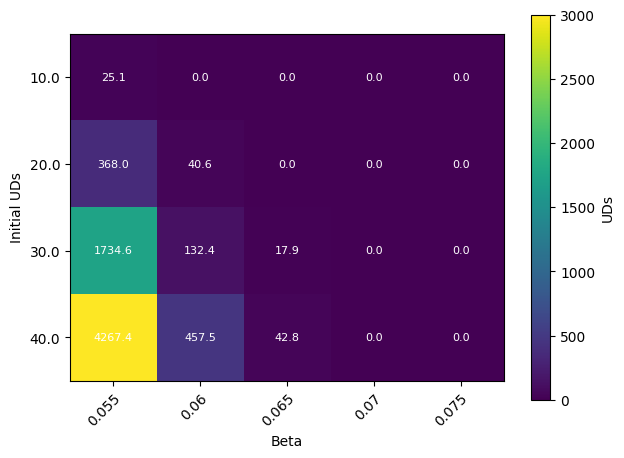

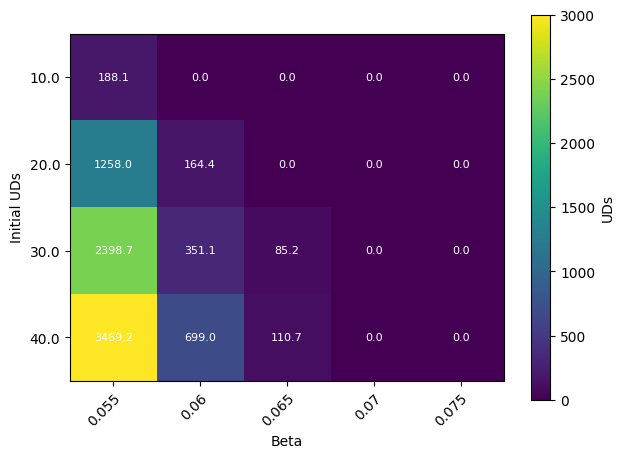

In [27]:
plot_heatmap(hM_datos, halphas, hbetas, 'Initial UDs', 'Beta', 'alive')
plot_heatmap(hM_datos, halphas, hbetas, 'Initial UDs', 'Beta', 'std')

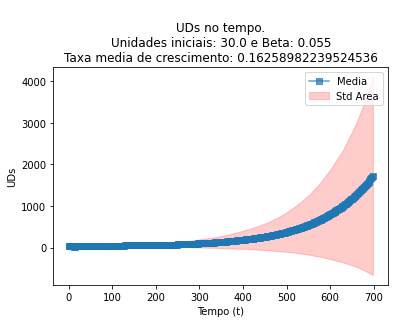

In [12]:
x = 0
y = 2

# MEan line
plt.plot(hM_behavior[y][x]['tempo'], hM_behavior[y][x]['mean'], 's-', label='Media', alpha=0.7)

# Std
plt.fill_between(hM_behavior[y][x]['tempo'], hM_behavior[y][x]['mean'] - hM_behavior[y][x]['std'],
                 hM_behavior[y][x]['mean'] + hM_behavior[y][x]['std'], color='red', alpha=0.2, label='Std Area')

plt.xlabel('Tempo (t)')
plt.ylabel('UDs')
plt.title(f'''
UDs no tempo.
Unidades iniciais: {halphas[y]} e Beta: {hbetas[x]:.3f}
Taxa media de crescimento: {hM_behavior[y][x]['growth rate']}''')
plt.legend()
plt.show()